In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,"..")
from env.project_variables import *
import matplotlib.pyplot as plt
from env.models_dir import *
from model.bert_normalize import get_bert_token_classification
from predict.predict_string_bert import interact_bert, bert_predict
import numpy as np
from training.bert_normalize.fine_tune_bert import run
from evaluate.interact import interact_bert_wrap
from model.bert_tools_from_core_code.tokenization import BertTokenizer



from io_.dat.constants import TOKEN_BPE_BERT_START, TOKEN_BPE_BERT_SEP, NULL_STR

from explore_data.bpe_statistics import bpe_statistics_on_data, n_token_with_k_norm,get_embedding_mat


from explore_data.embedding_visualization import plot_sentence_embedding


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
IMPORTS : initializing seeds...
IMPORTS : all imports successfully loaded   
Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


## Token level statistics

In [55]:
bpe_counter, bpe_normed_counter, bpe_need_norm_counter = bpe_statistics_on_data(TEST, "../dictionaries")

VOCABULARY : computing dictionary for word, char on /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/env/../../parsing/normpar/data/lexnorm.integrated for task normalize 
VOCABULARY : computing dictionary for normalized word also /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/env/../../parsing/normpar/data/lexnorm.integrated 
VOCABULARY : POS Vocabulary : pos dictionary untouched
Overwriting dictionary ../dictionaries/word.json
Overwriting dictionary ../dictionaries/word_norm.json
Overwriting dictionary ../dictionaries/character.json
Overwriting dictionary ../dictionaries/pos.json
Overwriting dictionary ../dictionaries/xpos.json
Overwriting dictionary ../dictionaries/type.json
VOCABULARY WORDS was not expanded on dev or test cause no external word embedding dict wa provided
VOCABULARY : 2151 word 1737 word_norm 111 char 4 xpos 4 pos 4 type encoded in vocabulary (including default token, an special tokens)
> /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/explore_da

Feeding source words ['_ROOT ', 'new ', 'pix ', 'comming ', 'tomoroe ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT new pictures coming tomorrow _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START l o v i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START m y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'C ', 'nt ', 'fuckn ', 'Slp ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT can not fucking sleep _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s n o 0 p _ b _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START h a h a h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 

Feeding source words ['_ROOT ', '@PapaD000 ', 'what ', 'u ', 'doin ', 'today ', '? ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @papad510 what you doing today ? _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M J E 0 9 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i d k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'there ', 'bitches ', 'withh ', 'meh ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT there bitches with me . _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ P E R C Y _ _ H A R V I N _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_

Feeding source words ['_ROOT ', 'Crembaathhhh ', 'timee ', '.. ', 'Yihaaa ', ':) ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT crembaathhhh time .. yihaaa :) _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START t e a c h i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START @ P r i n c e P i n n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START s o m e _END_

Feeding source words ['_ROOT ', 'evrybodi ', 'follow ', '@imfuckincg ', 'thx ', ':) ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT everybody follow @imfuckincg thanks :) _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S i n c e r e l y _ L a d i e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START H & M _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START i 

Feeding source words ['_ROOT ', '@DCurrent ', 'suite ', '000 ', 'it ', 's ', 'liveeee ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @dcurrent suite 101 it is live _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START o r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@HorneyMedia ', 'Thanx ', '0 ', 'the ', 'Blog ', 'Retweets ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @horneymedia thanks 4 the blog retweets _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ r r a c h h h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START d u n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', '@Dcoiinz ', 'Did ', 'someone ', 'force ', 'u ', '? ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @dcoiinz did someone force you ? _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ H e y J o a n n a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START N o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NO

Feeding source words ['_ROOT ', '@sugarplum000 ', 'when ', 'u ', 'coming ', 'home ', '? ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @sugarplum125 when you coming home ? _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ P r i n c e T a t t e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w h y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| '

Feeding source words ['_ROOT ', '@Lanae000 ', 'Tryin ', 'find ', 'my ', 'fone ', '.... ', 'smh ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @lanae810 trying find my phone .... smh _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ b r a n c o j u l l i a n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START a p p r o v e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START j o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'is ', 'nt ', 'tired ', 'at ', 'alll ', ':S ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT is not tired at all : _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ d a d d y _ m a c c _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD

Feeding source words ['_ROOT ', 'Wat ', 'beta ', 'than ', 'd ', 'wkend ', 'ai ', '. ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT what beta than the weekend ai . _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ j o n o m i t e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START t h a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| 

Feeding source words ['_ROOT ', '@Tha_dreamer ', 'hunni ', 'kimmy ', 'is ', 'thick ', '! ', 'Lol ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @tha_dreamer honey kimmy is thick ! lol _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START S u n - b a k i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START a n d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM

Feeding source words ['_ROOT ', 'planb ', 'is ', 'the ', 'shittttt ', '. ', '#handsdown ', '!!!! ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT planb is the shit . #handsdown !!!! _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START C a r r i e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START U n d e r w o o d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2|

Feeding source words ['_ROOT ', '@Feira000 ', 'foto ', 'and ', 'upload ', 'ya ', '.... ', 'thanks ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @feira471 photo and upload ya .... thanks _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START M y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START s l e e p i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', 'U ', 'sick ', 'but ', 'u ', 'out ', 'partying ', '#see ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT you sick but you out partying #see _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START b a c k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'Korean ', 'ppl ', 'follback ', 'pls ', '!!!! ', '•(><)• ', '[ ', 'Like ', 'it ', '? ', 'http://bit.ly/0fum0a ', '] ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT korean people follback please !!!! (><) [ like it ? http://bit.ly/9fum6a ] _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START T h i n k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding Word normalized (word level) _ROOT think I am going to call it a night ..... _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ a l i l j u j u _ i n _ u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START l o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START n a w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START G e e z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ! ! _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START @ A d r i a n n a O h h Y e s s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 3| ', '_START i s _END_CHAR _PAD_

Feeding source words ['_ROOT ', 'niggas ', 'press ', 'for ', 'pussy ', 'it ', 'ai ', 'nt ', 'nothin ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT niggas press for pussy it is not nothing _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START n u t h i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b u t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding Word normalized (word level) _ROOT nothing but mhmmms and cools from now on _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B u t t a _ C a k e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B a n g g A B _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START j u s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START n o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@GivemedatDANNI ', 'Whippin ', 'Her ', 'Hair ', ',.!! ', 'Lmfao ', '! ', 'http://plixi.com/p/00000000 ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @givemedatdanni whipping her hair ,.!! lmfao ! http://plixi.com/p/52769683 _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T e e T o o S w e e t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START a u h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@TeeTooSweet ', 'auh ', ', ', 'wata ', 'is ', 'good ', 'for ', 'u ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @teetoosweet auh , what is good for you _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START G o o d n i g h t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START # 9 L i v e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W h o a a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ! ! _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s o m u c h s o u l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START t h a n k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START h e a d i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START o f f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START r i g h t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 3| ', '_START n w _END_CHA

Feeding source words ['_ROOT ', 'You ', "'re ", 'a ', 'bitch ', '. ', 'Just ', 'sayin ', "'. ", '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT you are a bitch . just saying '. _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START Y a a a a y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i z a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding Word normalized (word level) _ROOT yay is any body all here . love _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ D e s P i c A b l e L e e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l m a o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 3| ', '_START r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@BishopDonROB ', 'aww ', 'cause ', 'it ', 'makes ', 'u ', 'wan ', 'na ', 'cuddle ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bishopdonrob aww cause it makes you want to cuddle _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START k i c k i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b a c k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START . _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START @ S c o o b y _ A t k i n s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START a w w w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S H A C K D D _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START h a h a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START T h a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 3| ', '_START i s h _END_CHAR _PAD

Feeding source words ['_ROOT ', 'movin ', 'my ', 'hips ', 'rightly ', 'nd ', 'ever ', 'so ', 'slowlyy ', '(; ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT moving my hips rightly nd ever so slowly (; _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ 2 _ C O O L _ E _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START R a n d o m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START t e s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START m e h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START n i g g a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ X T I N A F A N 4 L I F E 9 2 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START n e e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SE

Feeding source words ['_ROOT ', '#worstrappersofthedecade ', 'the ', 'nigga ', 'on ', 'the ', 'edcation ', 'connection ', 'commercial ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT #worstrappersofthedecade the nigga on the education connection commercial lol _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W h i t e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b o i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ W h o b u t a r i i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START n o o o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START w a y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 3| ', '_START t h t _END_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'ShoutOut ', '@WET_DREAM ', 'Good ', 'Lookin ', 'out ', 'on ', 'the ', 'Follow ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT shoutout @wet_dream good looking out on the follow ! _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', "_START ' m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'I ', "'m ", 'hott ', '.. ', 'niigga ', 'need ', 'a ', 'window ', 'fan ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I am hot .. nigga need a window fan _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START a r e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START y o u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A w w w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START @ A n d r e a 7 T 8 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', "_START ' s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START * n t h n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START t o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START d o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | 

Feeding source words ['_ROOT ', 'RT ', 'if ', 'u ', 'wan ', 'na ', 'sneak ', 'out ', 'with ', 'me ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt if you want to sneak out with me _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ j o s i e _ b i e b e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START h e h e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w a n t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START t h e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START t w i t t e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START f a c e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START b o o k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 3| ', '_START a n d _END_C

Feeding source words ['_ROOT ', 'First ', 'weekend ', 'not ', 'partyin ', 'since ', 'i ', 'been ', 'n ', 'skool ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT first weekend not partying since i been in school _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', "_START ' m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding Word normalized (word level) _ROOT I am not gone lie i fucks wit goldson _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ J u n g M i n 0 4 0 3 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ? ? _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START F a c e b o o k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'Just ', 'woke ', 'uppp ', ', ', 'my ', 'throat ', 'hurttss ', 'owerrrr ', ":'( ", '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT just woke up , my throat hurts ow :'( _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START s h i t t y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START # w o r s t r a p p e r s o f t h e d e _END_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START W a k a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START F l o c k a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 3| ', '_START l m a o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', '@BonitaApple_Bom ', 'my ', 'lil ', 'ass ', 'all ', 'up ', 'in ', 'dat ', 'coochie ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bonitaapple_bom my little ass all up in that coochie lol _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l i k e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B e n _ L i p p e r t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START P u * * y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START i s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 3| ', '_START n o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@LovelyChante ', 'lmfaoooo ', 'it ', 's ', "sicken'n ", '& ', 'half ', 'of ', 'them ', 'r ', 'married ', 'smfh ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @lovelychante lmfaoooo it is sickening and half of them are married smfh _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START b e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T a m e T h e M O N E _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START # C O R R E C T I O N _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 3| ', '_START 

Feeding source words ['_ROOT ', '@charmaine00 ', 'Nvm ', 'I ', "'ll ", 'come ', '0 ', 'ur ', 'room ', '=) ', 'thx ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @charmaine26 nevermind I will come to ur room =) thanks _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B e d S t u y G a b _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ R o b e r t s _ R u l e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', "_START ' s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'This ', 'movie ', 'is ', 'starting ', 'to ', 'get ', 'wierd ', 'A.F ', 'haha ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT this movie is starting to get weird A.F haha _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START u s s s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START v i i r g o o s s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START h o r r a y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ! ! _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START d a m n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'ridin ', 'wit ', 'Shawn ', '& ', 'La ', 'Danny ', '.. ', 'missed ', 'my ', 'la ', 'niggas ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT riding wit shawn and la danny .. missed my la niggas _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START H e y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START g i r l s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START . _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START s o m e o n e # _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START c o l d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@COCOA_LICIOUS ', 'i ', "'m ", 'n ', 'school ', 'till ', '0 ', 'on ', 'mondays ', 'n ', 'wednesdays ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @cocoa_licious I am in school till 9 on mondays and wednesdays _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ b r o w n _ s u g a b a b y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START l o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START j u s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START p a s s e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START t h a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'On ', 'the ', 'fone ', 'w. ', 'my ', 'mommy ', 'I ', 'miss ', 'her ', '=( ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT on the phone with my mommy i miss her =( _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ c a s s i e d i d y c z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START : ( _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START U _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START g o o d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'Makeup ', 'frm ', 'yesterday ', '.. ', 'all ', 'OCC ', '& ', 'Sugarpill ', ':) ', 'http://twitpic.com/00jra0 ', 'http://twitpic.com/00jrab ', 'http://twitpic.com/00jr0y ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT makeup from yesterday .. all occ and sugarpill :) http://twitpic.com/30jra8 http://twitpic.com/30jrab http://twitpic.com/30jr9y _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ t e a b a b y _ 8 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START y e a h _END_CHAR _

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ _ c h y n a d o l l x _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START L m a o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'NewYork ', 'next ', 'month ', 'for ', 'my ', 'bday ', ', ', 'I ', "'m ", 'amped ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT newyork next month for my birthday , I am amped . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M a r k C u r r y B o o k _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START s m h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START w h y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START d i d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | 

Feeding source words ['_ROOT ', '@JoiNicole00 ', 'hell ', 'yeah ', '.. ', 'fuckin ', 'pervs ', '... ', 'wat ', 'chu ', 'doin ', '? ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @joinicole99 hell yeah .. fucking perverts ... what you doing ? _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START S o o o o o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START S c a r e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START f e e l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START s o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@Smharty_PantS ', 'if ', 'he ', 'd ', 'nt ', 'already ', 'have ', 'her ', '... ', 'mackin ', 'ass ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @smharty_pants if he does not already have her ... mackin ass _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ H i i I m H e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding Word normalized (word level) _ROOT @hiiimher i did #tt because me and you going out ! _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START J u s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START c r a z i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START h o w _END_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@fourpagesASHA_ ', 'no ', 'girls ', 'on ', 'my ', 'side ', ', ', 'u ', 'got ', 'the ', 'hoes ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @fourpagesasha_ no girls on my side , you got the hoes _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S u p i t s G l e n C o c o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START W a n t s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NO

Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s h o r t h a i r c h i c 0 9 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START s h i t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START w e l l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 3| ', '_START l o o k s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'man ', '... ', 'remember ', 'wen ', 'crunk ', 'music ', 'was ', 'the ', 'shyt ', '? ', 'lol ', '#memories ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT man ... remember wen crunk music was the shit ? lol #memories _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START H a h a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START Z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START o f f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START t o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START b e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'ohhhh ', 'and ', 'by ', 'the ', 'way ', '@patgillett ', 'is ', 'a ', 'freaking ', 'god ', '! ', 'seriouslyyyy ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT oh and by the way @patgillett is a freaking god ! seriously _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A y e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S h a n a T h e M o s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START w a s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 3

Feeding source words ['_ROOT ', '@PMBNicole ', 'Chillin ', 'layin ', 'down ', 'an ', 'no ', 'i ', 'have ', "n't ", 'is ', 'he ', 'good ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @pmbnicole chilling laying down an no i have not is he good _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START O k a y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START . . . _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'Mmmm ', '! ', 'mcdonald ', "'s ", 'sweet ', 'tea ', 'tastes ', 'sooo ', 'good ', 'right ', 'now ', '!! ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT mmmm ! mcdonald 's sweet tea tastes so good right now !! _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START L o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START . . _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START N e w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b l o g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 2| ', '_START p o s t i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'I ', 'love ', '@nappy_gal ', '@itsmeChelseaVEE ', 'y ', 'all ', 'made ', 'my ', 'night ', 'tonight ', '.. ', 'Hahaah ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i love @nappy_gal @itsmechelseavee you all made my night tonight .. haha _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START d o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START T h e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START W a y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 2| ', '_START y u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@KiaHampton ', 'You ', "'re ", 'welcome ', 'babe ', '. ', "Let's ", 'make ', 'it ', 'happen ', '! ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @kiahampton you are welcome babe . lets make it happen ! _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ A l e x a n d r a G a t e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@Stu0000 ', 'Ooowa ', 'which ', 'city ', 'was ', 'this ', '?! ', 'Hope ', 'u ', 'r ', 'ok ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @stu2075 ooowa which city was this ?! hope you are ok _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START G o t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START t a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'Got ', 'ta ', 'finish ', 'this ', 'animtion ', 'project ', ', ', 'then ', 'I ', 'am ', 'going ', 'to ', 'be ', 'knocked ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT got to finish this animation project , then I am going to be knocked _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START N o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START R T _END_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'No ', 'RT ', '@Meechy_Babyy ', 'Guys ', 'would ', 'u ', 'let ', 'your ', 'wifey ', 'mess ', 'w/ ', 'other ', 'woman ', '? ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT no rt @meechy_babyy guys would you let your wife mess with other woman ? _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START d o _EN

Feeding source words ['_ROOT ', 'I ', 'do ', "n't ", 'cum ', 'quick ', 'but ', 'when ', 'I ', 'do ', 'it ', 's ', 'fantastic ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i do not come quick but when i do it is fantastic . _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ L i t t l e C B e a d l e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START F o l l o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@LittleCBeadles ', 'Follow ', 'me ', ', ', 'please ', '! ', 'i ', "'m ", 'from ', 'Brazil ', '! ', 'I ', 'LOVE ', 'U ', '♥ ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @littlecbeadles follow me , please ! I am from brazil ! i love you ♥ _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R o l l i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START o n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'Rollin ', 'on ', 'da ', 'river ', 'lookin ', 'ass ', 'hahaha ', 'i ', 'm ', 'weak ', '@britbrat0000 ', 'n ', '@dsimmons00 ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rolling on the river looking ass haha I am weak @britbrat0510 and @dsimmons90 _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M a m i C o l l i n s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START & _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@MamiCollins ', '& ', '@tommiecollins ', 'are ', 'so ', 'cute ', ', ', 'they ', "'re ", 'friiied ', 'like ', 'shit ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @mamicollins and @tommiecollins are so cute , they are fried like shit lol _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ D a t A b o m i n a t i o n D _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@DatAbominationD ', 'I ', 'WILL ', 'C ', 'WAT ', 'I ', 'CAN ', 'DO ', '( ', 'BUSINESS ', 'VOICE ', ') ', 'HEHE ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @databominationd i will see what i can do ( business voice ) hehe _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s a c h i n _ r t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START o n l y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@sachin_rt ', 'only ', 'current ', 'player ', 'in ', 'ESPNcricinfo ', 'all ', '- ', 'time ', 'World ', 'XI ', 'congrats ', 'sachin ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @sachin_rt only current player in espncricinfo all - time world xi congratulations sachin . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W a t c h i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START t h e _END_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'Watching ', 'the ', 'Sucker ', 'Free ', 'Countdown ', ', ', 'wiz ', 'khalifa ', 'is ', 'at ', '#0 ', '. ', '#blackandyellow ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT watching the sucker free countdown , wiz khalifa is at #7 . #blackandyellow _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START u g h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START y e 

Feeding source words ['_ROOT ', 'ugh ', 'yea ', "c'mon ", 'a ', 'wat ', 'ya ', 'say ', 'now ', 'cyyea ', 'aye ', 'turn ', 'me ', 'up ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT ugh yea c'mon a what ya say now cyyea aye turn me up _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W a s s T h e e D e a a l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w i t h h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'WassTheeDeaal ', 'withh ', 'y ', 'all ', 'dudes ', 'wantin ', 'tuu ', 'do ', 'it ', 'anywhere ', '? ', '... ', 'sheesh ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT wasstheedeaal with you all dudes wanting to do it anywhere ? ... sheesh _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W o o o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START o f _END_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'Wooow ', 'of ', 'course ', ', ', 'I ', 'should ', 'a ', 'known ', 'that ', 'was ', 'comingg ', '.. ', '>_< ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT wooow of course , i should have known that was coming .. >_< _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START B b m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START s h a r p l y _END_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'Bbm ', 'sharply ', '" ', '@ms_olateju ', ': ', 'Yep ', '! ', 'Yep ', '! ', 'Imo ', 'state ', 'sumtin ', '.... ', '" ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT bbm sharply " @ms_olateju : yep ! yep ! imo state something .... " _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ A d o t W e l l z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@AdotWellz ', 'lol ', 'I ', 'feel ', 'your ', 'pain ', 'white ', 'people ', 'gettim ', 'too ', 'comfortable ', 'nowadays ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @adotwellz lol i feel your pain white people getting too comfortable nowadays ! _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START # S p e a k n o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START u m m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', '#Speaknow ', 'umm ', '... ', '. ', 'yeah ', 'i ', 'ai ', 'nt ', 'gon ', 'lie ', 'it ', 'was ', 'gud ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT #speaknow umm ... . yeah i am not gonna lie it was good _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START # b l a c k a n d y e l l o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START p l a y i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '#blackandyellow ', 'playin ', 'at ', '#00 ', '... ', 'Just ', 'another ', 'reason ', 'I ', 'love ', 'being ', 'from ', 'pgh ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT #blackandyellow playing at #86 ... just another reason i love being from pittsburgh _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START C o n g r a t s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START : ) _END_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'Congrats ', ':) ', 'RT ', '@ohmeranda ', 'I ', 'was ', 'just ', 'mooned ', 'by ', 'my ', 'sister ', 'o_O ', 'bwahahahahah ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT congratulations :) rt @ohmeranda i was just mooned by my sister o_o bwahaha _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B I T A l i k e a c o p _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START j u s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', '@BITAlikeacop ', 'jus ', 'everyday ', 'pranks ', 'lol ', 'nothing ', 'that ', 'would ', 'break ', 'bones ', 'or ', 'anything ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bitalikeacop just everyday pranks lol nothing that would break bones or anything lol _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T a l e n t e d _ S h a r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w a t c h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@Talented_Shar ', 'watch ', 'ya ', 'mouf ', '! ', '#getslapped ', 'lol ', '! ', 'Miss ', 'u ', 'and ', 'head ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @talented_shar watch ya mouth ! #getslapped lol ! miss you and head ! _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ R e R e S o o P r e d d i e e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b u t t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@ReReSooPreddiee ', 'butt ', 'butt ', 'I ', 'THOUGHT ', 'YOUU ', 'LOVED ', 'HIMM ', '? ', '- ', 'whaat ', 'i ', 'tell ', 'yaa ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @reresoopreddiee butt butt i thought you loved him ? - what i tell you _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ N E R D Y K i D x D _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@NERDYKiDxD ', 'i ', 'do ', 'too ', '! ', '(x ', 'bt ', 'sometimesz ', 'thei ', 'r ', 'fuun ', '! ', '(: ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @nerdykidxd i do too ! (x but sometimes they are fun ! (: _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A l l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START t h a t _END_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'All ', 'that ', 'glitters ', 'is ', 'not ', 'Gold ', 'Esp ', 'in ', 'the ', 'SEO ', 'World ', '... ', 'http://sarugeorge.wordpress.com/0000/00/00/all-that-glitters-is-not-gold/ ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT all that glitters is not gold especially in the seo world ... http://sarugeorge.wordpress.com/2010/10/25/all-that-glitters-is-not-gold/ _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ i i t s m a r i i a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@iitsmariia ', 'why ', 'are ', 'u ', 'telling ', 'people ', 'wat ', 'you ', 'like ', 'about ', 'themm ', '? ', '(; ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @iitsmariia why are you telling people what you like about them ? (; _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', "_START ' v 

Feeding source words ['_ROOT ', 'I ', "'ve ", 'been ', 'fighting ', 'myself ', 'on ', 'this ', 'for ', 'the ', 'past ', '0 ', 'mnths ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I have been fighting myself on this for the past 5 months lol _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ b e y o n d t w o t r e e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START p r o b s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', '@beyondtwotrees ', 'probs ', 'wo ', 'nt ', 'be ', 'for ', 'a ', 'while ', 'T________T ', 'we ', "'ll ", 'see ', ';o ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @beyondtwotrees probably will not be for a while T________T we will see ;o _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ P u n k r o c k a 2 1 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START o m w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', '@Punkrocka00 ', 'omw ', '! ', 'Hw ', 'could ', 'I ', '0get ', 'pepper ', 'anne ', '! ', 'The ', 'ultimate ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @punkrocka21 omw ! how could i forget pepper anne ! the ultimate lol _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ P r 3 t t y L i l T a u r u s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w e l l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', '@Pr0ttyLilTaurus ', 'well ', 'if ', 'u ', 'wan ', 'na ', 'talk ', 'about ', 'it ', 'holla ', 'back ', 'at ', 'me ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @pr3ttyliltaurus well if you want to talk about it holler back at me _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M o n i c a W h a a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l m a o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '@MonicaWhaat ', 'lmao ', 'you ', 'watching ', 'Bill ', 'and ', 'Ted ', 's ', 'excellent ', 'adventure ', 'too ', '? ', ':d ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @monicawhaat lmao you watching bill and Ted 's excellent adventure too ? :d _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START D a n i e l l e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'Danielle ', 'be ', 'try ', 'na ', 'front ', 'like ', 'she ', 'not ', 'tired ', '... ', 'Ahe ', 'such ', 'a ', 'lil ', 'baby ', 'ILH ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT danielle be try to front like she not tired ... she sucha sucha little baby ilh _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M a m a _ C a l i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@Mama_Cali ', 'I ', 'was ', 'thinkin ', 'the ', 'same ', 'thing ', 'lol ', 'it ', 'was ', 'nt ', 'her ', 'bible ', 'study ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @mama_cali i was thinking the same thing lol it was not her bible study _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B I G b o y s l i m e o w w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w o o o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@BIGboyslimeoww ', 'wooo ', 'yeah ', 'so ', 'thanksgiving ', 'is ', 'soon ', 'and ', 'kacee ', 'added ', 'me ', 'on ', 'fb ', 'doood ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bigboyslimeoww wooo yeah so thanksgiving is soon and kacee added me on facebook dude _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ a n n g i e e e e _ _ _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', '@anngieeee__ ', 'I ', "'ll ", 'hit ', 'u ', 'up ', 'later ', 'iPhone ', 's ', 'dieingg ', ':( ', 'haha ', 'bye ', 'byeee ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @anngieeee__ I will hit you up later iPhone is dying :( haha bye bye _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M r D i r t y S a y s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START T h e y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@MrDirtySays ', 'They ', 'kno ', 'to ', 'leave ', 'when ', 'I ', 'robe ', 'up ', 'walk ', 'toward ', 'the ', 'door ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @mrdirtysays they know to leave when i robe up walk toward the door lol _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START w e d d i n g g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ? _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'weddingg ', '? ', 'when ', 'lol ', '? ', 'RT ', '@AmbberNicoleeee ', 'Awhh ', 'i ', 'ca ', 'ntt ', 'waait ', 'till ', 'my ', 'weddinqq ', '(: ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT wedding ? when lol ? rt @ambbernicoleeee awhh I can not wait till my wedding (: _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START w h o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START a r e _END_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'who ', 'are ', 'you ', '? ', '— ', 'I ', 'm ', 'good ', '.. ', 'a ', 'bit ', 'tured ', 'actually ', 'http://0ms.me/aKuxMi ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT who are you ? — I am good .. a bit tired actually http://4ms.me/akuxmi _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ I L o v e M a r k _ A I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@ILoveMark_AI ', 'I ', 'accidentally ', 'retweeted ', 'that ', 'hahaha ', 'oops ', 'and ', 'omg ', 'I ', "'d ", 'be ', 'so ', 'embarrased ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @ilovemark_ai i accidentally retweeted that haha oops and omg I would be so embarrassed _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T i f f y _ R o z a y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w h e n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '@Tiffy_Rozay ', 'when ', 'they ', 'was ', 'askin ', 'for ', 'OFFeRING ', 'I ', 'thought ', 'that ', 'was ', 'the ', 'end ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @tiffy_rozay when they was asking for offering i thought that was the end lol _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START y o

Feeding source words ['_ROOT ', 'If ', 'you ', 'kno ', 'how ', 'much ', 'I ', 'hate ', 'somethin ', 'then ', 'y ', 'still ', 'do ', 'it ', '#unspokenRule ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT if you know how much i hate something then why still do it #unspokenrule _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START @ P M B _ K A R 

 ------ Target characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR|  NORM : 1 |SENT 0 WORD 0| \n ', '_START r t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR|  NORM : 0 |SENT 0 WORD 1| \n ', '_START @ p m b _ k a r i s m a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR|  NORM : 0 |SENT 0 WORD 2| \n ', '_START b e t t e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR|  NORM : 0 |SENT 0 WORD 3| \n ', '_START g e t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'I ', 'can ', 'tell ', 'you ', 'tht ', 'my ', 'love ', 'for ', 'you ', 'will ', 'still ', 'be ', 'stong ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i can tell you that my love for you will still be strong . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ p a i n t e d _ b i r d i e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START G o t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', '@painted_birdie ', 'Got ', 'ta ', 'keep ', 'ur ', 'sense ', 'of ', 'humor ', '- ', 'it ', "'s ", 'all ', 'good ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @painted_birdie got to keep your sense of humor humor it is all good ! _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START F o o t b a l l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START g a m e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'Football ', 'games ', 'ehh ', '. ', 'Hopefully ', 'the ', 'other ', 'ones ', 'r ', 'a ', 'lot ', 'mor ', 'fun ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT football games ehh . hopefully the other ones are a lot more fun ! _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A r e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START y o u _END_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', 'Are ', 'you ', 'ready ', '? ', 'I ', 'know ', 'the ', 'city ', 'ai ', 'nt ', 'readyy ', 'for ', 'me ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT are you ready ? i know the city is not ready for me . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START d a a m n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START a i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'daamn ', 'ai ', 'nt ', 'nothin ', 'sexier ', 'then ', 'a ', 'nice ', 'just ', 'washed ', 'and ', 'shaved ', 'panocha ', '.. ', 'mmmm ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT damn is not nothing sexier than a nice just washed and shaved panocha .. mmmm _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START @ K i d k i l

Feeding source words ['_ROOT ', 'RT ', '@KidkillahSam ', ': ', 'Yay ', 'allergies ', '-_- ', '>>>> ', 'what ', 'a ', 'coke ', 'head ', 'i ', 'hear ', 'u ', 'from ', 'here ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @kidkillahsam : yay allergies _>>>> _>>>> what a coke head i hear you from here _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START u _END_CHAR _PAD_

Feeding source words ['_ROOT ', 'RT ', 'u ', 'day ', 'dreaming ', 'ka ', '? ', '@kiru_b ', ': ', 'i ', "'m ", 'here ', 'but ', 'not ', 'really ', '... ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt you day dreaming ka ? @kiru_b : I am here but not really ... _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START a m _END_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'I ', 'am ', 'sooooooo ', 'proud ', 'of ', '@BluVisions ', '. ', 'She ', 'did ', 'her ', 'thing ', 'tonight ', '. ', 'www.0bluvision.com ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i am so proud of @bluvisions . she did her thing tonight . www.1bluvision.com . _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_

Feeding source words ['_ROOT ', 'I ', 'really ', 'gt ', 'inportant ', 'sumfng ', '0 ', 'say ', '0 ', 'sum0 ', 'bt ', 'nt ', 'gon ', 'na ', 'say ', 'it ', '! ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i really got important something to say to someone but not going to say it ! _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ m r s a l e x b u r n h a m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', '@mrsalexburnham ', 'u ', 'r ', 'too ', 'slow ', ', ', 'u ', 'need ', 'to ', 'keep ', 'up ', 'with ', 'alex ', 'and ', 'me ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @mrsalexburnham you are too slow , you need to keep up with alex and me _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START Y e a h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ! _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'Yeah ', '! ', 'U ', 'replying ', 'to ', 'my ', 'tweets ', 'confrims ', 'my ', 'thought ', 'of ', 'u ', 'being ', 'gay ', '@quique00 ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT yeah ! you replying to my tweets confirms my thought of you being gay @quique07 _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START @ C h y n a 

Feeding source words ['_ROOT ', 'RT ', '@ChynaMonroe ', ': ', 'Fuck ', '#footballWives ', '. ', 'Lol ', 'fkn ', 'sunbeams ', 'n ', 'shit ', '<-- ', '#DEAD ', ', ', 'LMFAOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @chynamonroe : fuck #footballwives . lol fucking sunbeams and shit < #dead , lmfaoooooooooooooooooooooooooooooooooooooooooooooooo . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START U _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'U ', 'need ', 'a ', 'nap ', 'RT ', '@Ky_Zen ', 'SHUT ', 'UP ', 'u ', 'whore ', 'we ', 'ALL ', 'know ', 'it ', 'was ', 'consensual ', '!! ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT you need a nap rt @ky_zen shut up you whore we all know it was consensual !! _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l o v e _END_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'I ', 'love ', 'it ', 'when ', 'ppl ', 'be ', 'on ', 'FB ', '& ', 'Twitter ', 'talkin ', 'ish ', 'for ', 'no ', 'reason ', '! ', '#GrowUp ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i love it when people be on facebook and twitter talking shit for no reason ! #growup _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START Y a y y y y y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START ! ! ! ! _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'Yayyyyy ', '!!!! ', 'Got ', '@Mark_Salling ', "'s ", 'newww ', 'cd ', '!!!!!!!! ', 'So ', 'elated ', '. ', 'He ', "'s ", 'a ', 'higher ', 'power ', '. ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT yay !!!! got @mark_salling 's new cd !!!!!!!! so elated . he is a higher power . _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ h u r l e y f y e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START I f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@hurleyfyed ', 'If ', 'you ', 'doing ', 'a ', 'Karate ', 'Kid ', 'themed ', 'costume ', 'I ', 'want ', 'in ', 'on ', 'it ', 'bro ', '! ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @hurleyfyed if you doing a karate kid themed costume i want in on it brother ! _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ i B e l i e b i n G o m e z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I S U P E R L O V E C O D A H _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0

Feeding source words ['_ROOT ', '@iBeliebinGomez ', 'ISUPERLOVECODAH ', ', ', 'that ', 'I ', "'m ", "goin' ", 'to ', 'make ', 'her ', 'a ', 'fansign ', '. ', 'LOL ', ';) ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @ibeliebingomez isuperlovecodah , that I am going to make her a fansign . lol ;) _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START U g h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _P

Feeding source words ['_ROOT ', 'Ugh ', 'I ', 'wish ', 'I ', 'could ', 'stick ', 'to ', 'my ', 'word ', 'and ', 'say ', 'goodbye ', 'forever ', 'to ', 'u ', '! ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT ugh i wish i could stick to my word and say goodbye forever to you ! _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START B e f o r e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'Before ', 'I ', 'go ', 'any ', 'further ', 'I ', 'wan ', 'na ', 's/o ', 'my ', 'homie ', '@BdotDiddy00 ', 'wuz ', 'up ', 'nigga ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT before i go any further i want to shoutout my homeboy @bdotdiddy20 what's up nigga . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START U _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START k n o w _EN

Feeding source words ['_ROOT ', 'U ', 'know ', '...... ', 'A ', '= ', 'if ', 'it ', 'ai ', 'nt ', 'one ', 'thing ', ', ', 'it ', 's ', 'another ', '...... ', 'lol ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT you know ...... a = if it is not one thing , it is another ...... lol _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START i f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'RT ', 'if ', 'U ', 'still ', 'wonder ', 'how ', 'spongebob ', 'and ', 'patrick ', 'can ', 'actually ', 'go ', 'to ', 'the ', 'beach ', 'underwater ', '. ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt if you still wonder how spongebob and patrick can actually go to the beach underwater . _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ a l l p o l o e v r y t h n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START y e a h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@allpoloevrythng ', 'yeah ', 'i ', "'m ", 'just ', 'dead ', 'sleepy ', 'now ', 'blahhh ', '. ', 'ey ', 'do ', 'you ', 'have ', 'a ', 'facebook ', '? ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @allpoloevrythng yeah I am just dead sleepy now blahhh . hey do you have a facebook ? _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START m _END_CH

Feeding source words ['_ROOT ', 'i ', 'm ', 'pretty ', 'fucking ', 'high ', 'right ', 'now ', '. ', 'i ', 'think ', 'i ', 'just ', 'found ', 'a ', 'new ', 'bud ', 'man ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I am pretty fucking high right now . i think i just found a new bud man _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START N a t s h a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START t a l k i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'Natsha ', 'talkin ', 'bout ', 'she ', 'gon ', 'na ', 'be ', 'on ', 'animal ', 'planet ', 'fighting ', 'with ', 'snakes ', 'lmao ', '! ', 'she ', 's ', 'hilirious ', '.. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT natsha talking bout she going to be on animal planet fighting with snakes lmao ! s is hilarious .. _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ J D _ B i e b e r _ G E R _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START b e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@JD_Bieber_GER ', 'be ', 'really ', ', ', 'really ', 'sad ', '.. ', 'and ', 'probably ', 'wo ', 'nt ', 'be ', 'bf ', 'with ', 'her ', 'anymore ', '.. ', ':(( ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @jd_bieber_ger be really , really sad .. and probably wo nt be boyfriend with her anymore .. :(( _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START U _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'U ', 'shut ', 'up ', '!!!! ', 'RT ', '@AnArchy_00 ', ': ', '@Raven_Elle ', 'yup ', '! ', 'That ', 'Hannah ', 'Montana ', 'ish ', 'u ', 'wear ', '! ', 'Lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT you shut up !!!! rt @anarchy_30 : @raven_elle yup ! that hannah montana shit you wear ! lol _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START h o m e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | N

Feeding source words ['_ROOT ', 'home ', 'from ', 'chicago ', ', ', 'deadmau0 ', 'was ', 'great ', ', ', 'time ', 'to ', 'talk ', 'to ', 'muh ', 'gf ', 'and ', 'go ', 'ta ', 'bedddd ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT home from chicago , deadmau5 was great , time to talk to my girlfriend and go to bed _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START D e l e t e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START M 

Feeding source words ['_ROOT ', 'Deleted ', 'My ', 'Myspace ', '. ', 'I ', 'Could ', 'Barely ', 'Remeber ', 'My ', 'Password ', 'To ', 'Login ', 'And ', 'Delete ', 'It ', '. ', 'Lol ', ', ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT deleted my myspace . i could barely remember my password to login and delete it . lol , _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START i n d i a n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD

Feeding source words ['_ROOT ', 'indian ', 'news ', 'tv ', 'must ', 'consider ', '#SameLanguageSubtitling ', 'to ', 'imprv ', 'english ', 'lang ', 'skills ', 'among ', 'the ', 'youth ', '. ', '@bdutt ', '@Brij_PlanetRead ', '@sardesairajdeep ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT indian news tv must consider #samelanguagesubtitling to improve english lang skills among the youth . @bdutt @brij_planetread @sardesairajdeep _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'RT ', '@SB_pwild ', ': ', 'Shawty ', 'I ', "'m ", 'da ', 'bussiness ', 'and ', 'I ', 'got ', 'monkey ', 'clips ', 'for ', 'niggaz ', 'dat ', 's ', 'bullshitin ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @sb_pwild : shorty I am the business and i got monkey clips for niggas that is bullshitting _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ I m T h e F u x k i n B e s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@ImTheFuxkinBest ', 'lol ', 'buh ', 'yo ', 'ass ', 'bhee ', 'eer ', 'wheeree ', 'so ', 'iht ', 'shoul ', 'nt ', 'bhee ', 'thaa ', 'faar ', 'from ', 'yhu ', 'lmcaaao ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @imthefuxkinbest lol bro yo ass be here where so it should not be that far from you lmcaaao _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ j u s t i n b i e b e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START i s _END_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@justinbieber ', 'is ', 'gon ', 'na ', 'take ', 'home ', 'that ', 'best ', 'new ', 'artist ', '! ', 'No ', 'doubt ', '! ', 'His ', 'fans ', 'are ', 'ammmmmazing ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @justinbieber is going to take home that best new artist ! no doubt ! his fans are amazing ! _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START “ _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', '“ ', '@AFTAHSuM_000 ', ': ', 'Y ', "'all ", 'come ', 'fux ', 'wit ', 'us ', '0marrow ', 'at ', '@THUGGYFRESH ', 'album ', 'release ', 'party ', '!! ', 'Hit ', 'me ', 'fo ', 'info ', '! ', '” ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT “ @AFTAHSuM_408 : you all come fuck wit us tomorrow at @thuggyfresh album release party !! hit me for info ! ” _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'I ', "'m ", 'so ', 'makeing ', 'up ', 'for ', 'this ', 'dead ', 'ass ', 'week ', 'next ', 'week ', 'so ', 'yea ', 'party ', 'party ', 'party ', '.... ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I am so making up for this dead ass week next week so yea party party party .... _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ R o s e B e l i e b s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START H a h a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', '@RoseBeliebs ', 'Haha ', 'i ', 'noe ', 'riqht ', ';L ', 'i ', 'm ', 'acc ', 'a ', 'HUGE ', 'belieber ', '; ', 'how ', 'old ', 'r ', 'u ', ':) ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @rosebeliebs haha i noe right ;L I am actually a huge belieber ; how old are you :) _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM :

Feeding source words ['_ROOT ', 'RT ', '@BigKenof000MOBB ', ': ', '@ESKIMO_JOE_BRRR ', 'you ', 'should ', 'do ', 'a ', 'joint ', 'with ', '@ForeverCViXxXeN ', '#moneyaddictgang ', '<< ', 'u ', 'know ', 'ain ', 'trippn ', 'at ', 'all ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @bigkenof334mobb : @eskimo_joe_brrr you should do a joint with @forevercvixxxen #moneyaddictgang << you know ain't tripping at all _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ F i r e F i g h t e r S a m 7 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1|

Feeding source words ['_ROOT ', '@FireFighterSam0 ', 'jerkk ', 'i ', 'texted ', 'you ', 'the ', 'other ', 'day ', 'and ', 'no ', 'reply ', '. ', 'so ', 'much ', 'for ', 'keepin ', 'in ', 'touch ', '-____- ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @firefightersam7 jerk i texted you the other day and no reply . so much for keeping in touch -____- _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START B e i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'Being ', 'sick ', 'sucks ', 'but ', 'lack ', 'of ', 'mobility ', 'helps ', 'w ', 'catching ', 'up ', 'on ', 'tv ', '. ', 'Going ', 'thru ', 'Haven ', 'now ', '... ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT being sick sucks but lack of mobility helps with catching up on tv . going thru haven now ... _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ c s a a v 0 0 1 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START B e l _EN

Feeding source words ['_ROOT ', '@csaav000 ', 'Bel ', 'Air ', 'here ', 'we ', 'come ', '<00 ', 'OMG ', '00 ', 'mins ', '!! ', 'Kris ', 'is ', 'watching ', 'it ', 'with ', 'me ', ';D ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @csaav001 bel air here we come <33 omg 10 minutes !! kris is watching it with me ;D _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START N o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR |

Feeding source words ['_ROOT ', 'No ', 'matter ', 'what ', 'role ', 'u ', 'think ', 'u ', 'play ', ', ', 'u ', 'r ', 'just ', 'the ', 'sideline ', ', ', 'know ', 'ur ', 'place ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT no matter what role you think you play , you r just the sideline , know your place _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ k e l s e y b e e 3 3 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START S u r e e e e e e e e e e e e e e e _END_CHAR _PAD

Feeding source words ['_ROOT ', '@kelseybee00 ', 'Sureeeeeeeeeeeeeee ', ', ', 'hahah ', ', ', 'is ', 'it ', 'a ', 'take ', 'it ', 'back ', 'one ', '? ', 'It ', "'d ", 'be ', 'much ', 'cooler ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @kelseybee33 sure , haha , is it a take it back one ? it would be much cooler . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R i R i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 W

Feeding source words ['_ROOT ', 'RiRi ', ', ', 'love ', 'u ', '0 ', 'pieces ', ', ', 'but ', 'u ', 'look ', 'like ', 'Nappi ', 'Longstockings ', ', ', 'Pippi ', "'s ", 'lil ', 'sister ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT riri , love your to pieces , but you look like nappi longstockings , Pippi 's little sister . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START s t r o n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ',

Feeding source words ['_ROOT ', 'strong ', 'wind ', 'from ', 'the ', 'north ', 'and ', 'sunshine ', 'all ', 'over ', 'the ', 'place ', '- ', 'nice ', 'treat ', 'after ', 'the ', 'looooong ', 'working ', 'saturday ', 'morning ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT strong wind from the north and sunshine all over the place - nice treat after the long working saturday morning _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ b o s s a c a f e z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', 

Feeding source words ['_ROOT ', '@bossacafez ', 'baking ', 'with ', '@vivalavee ', 'tmr ', ':) ', 'hmmm ', 'what ', 'you ', 'mean ', '? ', 'i ', 'just ', 'dump ', 'everything ', 'inside ', '! ', 'hahaha ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bossacafez baking with @vivalavee tomorrow :) hmmm what you mean ? i just dump everything inside ! haha . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ I a g r e e w i t h C H a n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START C o n g r a t z _END_CHAR _PAD_

Feeding source words ['_ROOT ', '@IagreewithCHan ', 'Congratz ', 'on ', 'the ', 'win ', '^^)) ', '#illbeback ', 'is ', 'really ', 'awesome ', '!!!!!!! ', '@follow_0PM ', 'i ', 'm ', 'waiting ', 'for ', 'the ', 'next ', 'contest ', '!!!!! ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @iagreewithchan congratulations on the win ^^)) #illbeback is really awesome !!!!!!! @follow_2pm I am waiting for the next contest !!!!! _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ n i c c i w r i t e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@nicciwrite ', 'yes ', '@harmonymuzik ', 'ignorant ', 'ass ', 'tweets ', 'about ', 'homeless ', 'ppl ', 'sparked ', 'it ', 'I ', 'just ', 'can ', 'not ', 'with ', 'that ', 'kind ', 'of ', 'shyt ', '!!!!! ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @nicciwrite yes @harmonymuzik ignorant ass tweets about homeless people sparked it i just can not with that kind of shit !!!!! _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START i f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'if ', 'u ', 'miss ', 'heaven ', ', ', 'u ', 'will ', 'cry ', '... ', 'Lord ', 'i ', 'ca ', 'nt ', 'afford ', 'to ', 'miss ', 'd ', 'rapture ', 'pls ', 'help ', 'me ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT if you miss heaven , you will cry ... lord i ca nt afford to miss the rapture please help me _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ _ J e s u s J a c k i e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START y e s s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', '@_JesusJackie ', 'yess ', 'i ', 'am ', '! ', 'how ', 'long ', 'has ', 'it ', 'been ', 'since ', 'we ', 'took ', 'a ', 'picture ', '?! ', 'EXACTLY ', '! ', ';D ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @_jesusjackie yes i am ! how long has it been since we took a picture ?! exactly ! ;D _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START # E s p n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| 

Feeding source words ['_ROOT ', '#Espn ', 'cricinfo ', 'world ', 'XI ', ', ', 'has ', 'only ', '@sachin_rt ', 'frm ', '#india ', 'n ', 'current ', 'players ', '.. ', 'Interestng ', 'no ', 'gavaskar ', 'n ', 'lara ', ', ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT #espn cricinfo world xi , has only @sachin_rt from #india in current players .. interesting no gavaskar and lara , _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START P i t y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'Pity ', '! ', 'Coz ', 'I ', 'do ', 'mind ', '! ', 'RT ', '@dexthemagician ', ': ', 'PearlyPoonkie ', 'I ', 'do ', 'nt ', 'mind ', 'buyin ', 'u ', 'those ', "mini's ", '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT pity ! because i do mind ! rt @dexthemagician : pearlypoonkie i do not mind buying you those mini's _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ L y r i c a l l y N i c e e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START l o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@LyricallyNicee ', 'lol ', 'yeah ', 'so ', 'do ', 'i ', 'back ', 'to ', 'back ', 'as ', 'we ', 'tweet ', '. ', '& ', 'i ', 'agree ', '-- ', 'bieber ', 'doin ', 'big ', 'things ', '. ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @lyricallynicee lol yeah so do i back to back as we tweet . and i agree -- bieber doing big things . _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S h e s _ P r e t t y P a i d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START m a n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@Shes_PrettyPaid ', 'man ', 'wat ', 'make ', 'you ', 'jus ', 'wan ', 'na ', 'say ', 'n ', 'do ', 'sumthings ', '!! ', 'Jus ', 'feel ', 'it ', 'all ', 'n ', 'ya ', 'chest ', 'lol ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @shes_prettypaid man what make you just want to say and do somethings !! just feel it all in your chest lol _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START # w o r s t r a p p e r s o f t h e d e _END_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START N e v a _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '#worstrappersofthedecade ', 'Neva ', 'Been ', 'A ', 'Hater ', 'And ', 'I ', 'm ', 'Not ', 'Startin ', 'Now ', 'If ', 'You ', 'Hustlin ', 'And ', 'Gettin ', 'Dough ', 'Shouts ', 'Out ', 'To ', 'You ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT #worstrappersofthedecade neva been a hater and I am not starting now if you hustling and getting dough shouts out to you _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W o w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'Wow ', '.. ', 'Gon ', 'na ', 'be ', 'a ', 'challenge ', 'to ', 'get ', 'up ', 'tomoro ', '.. ', 'But ', 'i ', 'm ', 'not ', 'tired ', 'so ', 'that ', 's ', 'my ', 'problem ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT wow .. going to be a challenge to get up tomorrow .. but I am not tired so that is my problem _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ i R i d e T O N G U E _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START w a s s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@iRideTONGUE ', 'wass ', 'good ', 'with ', 'my ', 'tongue ', 'sucking ', 'the ', 'shit ', 'out ', 'ta ', 'your ', 'clit ', 'to ', 'have ', 'your ', 'legs ', 'shake ', 'like ', 'a ', 'quake ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @iridetongue was good with my tongue sucking the shit out of your clitoris to have your legs shake like a quake _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START Y u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'Yu ', 'must ', 'be ', 'joking ', ', ', 'ALBUM ', 'OF ', 'THE ', 'YEAR ', 'THAT ', 'stillz ', 'RT ', ': ', '@FatalicJa ', 'ALMOST ', 'forgot ', 'how ', 'epic ', 'Distant ', 'Relatives ', 'is ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT you must be joking , album of the year that stillz rt : @fatalicja almost forgot how epic distant relatives is _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ g r o f f i c t i o n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START Y e a h _END_CHAR

Feeding source words ['_ROOT ', '@groffiction ', 'Yeah ', 'that ', 's ', 'perfect ', '. ', 'I ', 'know ', 'what ', 'to ', 'write ', ', ', 'you ', 'read ', 'my ', 'Do ', 'nt ', 'Stop ', 'oneshot ', 'right ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @groffiction yeah that is perfect . i know what to write , you read my do not stop oneshot right . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ C h r i s P i r i l l o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START t h a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '@ChrisPirillo ', 'that ', "'s ", 'plenty ', 'of ', 'time ', 'to ', 'either ', 'switch ', 'to ', 'OSX ', 'or ', 'Linux ', ', ', 'Windows ', 'Sux ', 'and ', 'we ', 'are ', 'prisoners ', 'of ', 'Ballmer ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @chrispirillo that is plenty of time to either switch to osx or linux , windows sucks and we are prisoners of ballmer _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START T h a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'That ', "'s ", 'crazy ', 'I ', 'really ', 'pik ', 'my ', 'hair ', 'in ', 'the ', 'morning ', 'like ', 'how ', '@realwizkhalifa ', 'does ', 'in ', 'that ', 'black ', 'n ', 'yellow ', 'video ', '#shwag ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I is crazy i really pick my hair in the morning like how @realwizkhalifa does in that black and yellow video #shwag _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ m i s s v 2 u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WOR

Feeding source words ['_ROOT ', '@missv0u ', '@kanyewest ', 'just ', 'be ', 'sayin ', 'shit ', 'to ', 'make ', 'people ', 'say ', 'shit ', '... ', 'people ', 'are ', 'dumb ', 'enough ', 'to ', 'start ', 'their ', 'own ', 'windmill ', 'lol ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @missv2u @kanyewest just be saying shit to make people say shit ... people are dumb enough to start their own windmill lol _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s u p e r b o i c h r i s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START o h _END_CHAR _PAD_

Feeding source words ['_ROOT ', '@superboichris ', 'oh ', 'yeaaaa ', 'the ', 'dinner ', '!!! ', 'sorry ', 'man ', 'I ', 'got ', 'sex ', 'on ', 'the ', 'brain ', '.. ', 'it ', 's ', 'blockin ', 'all ', 'my ', 'normal ', 'thoughts ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @superboichris oh yea the dinner !!! sorry man i got sex on the brain .. it is blocking all my normal thoughts _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ k w a z i e 1 7 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START I

Feeding source words ['_ROOT ', '@kwazie00 ', 'I ', "'m ", 'bout ', 'to ', 'but ', 'I ', 'moved ', 'wit ', 'my ', 'pops ', 'and ', 'ahit ', 'I ', 'had ', 'to ', 'get ', 'out ', 'ta ', 'there ', 'feel ', 'me ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @kwazie17 I am about to but i moved with my pops and shit i had to get out of there feel me _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START F e m a l e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START a i _END_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'Females ', 'ai ', 'nt ', 'shit ', 'cause ', 'y ', 'al ', 'hang ', 'on ', 'to ', 'shit ', 'that ', 'was ', 'never ', 'there ', 'I ', "'m ", 'snappin ', 'so ', 'let ', 'me ', 'vent ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT females are not shit cause you all hang on to shit that was never there I am snapping so let me vent _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0

Feeding source words ['_ROOT ', 'RT ', '@maikotsu ', ': ', '@RabbitLiphan ', 'I ', 'wan ', 'na ', 'this ', 'soooo ', 'much ', '!! ', '// ', 'If ', 'you ', 'want ', 'to ', 'please ', 'talk ', 'to ', '@ELFsInJapan ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @maikotsu : @rabbitliphan i want to this so much !! // if you want to please talk to @ . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START F i r s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD

Feeding source words ['_ROOT ', 'First ', 'Ganesh ', 'Chaturti ', 'with ', 'mom ', 'dad ', 'wife ', 'son ', 'n ', 'me ', '@ ', 'hyd ', '. ', 'Mom ', 'performed ', 'd ', 'puja ', ', ', 'our ', 'inhouse ', 'pujari ', ':) ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT first ganesh chaturti with mom dad wife son and me @ hyd . mom performed the puja , our inhouse pujari :) _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START N i c e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SE

Feeding source words ['_ROOT ', 'Nice ', '! ', 'Just ', 'arrived ', 'and ', 'been ', 'assigned ', 'to ', 'handle ', 'airline ', '! ', 'Much ', 'better ', 'thaann ', 'handle ', 'a ', 'bunch ', 'of ', 'domestic ', 'c/o ', '\\(´▽`)/ ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT nice ! just arrived and been assigned to handle airline ! much better than handle a bunch of domestic c/0 \(´▽`)/ _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'I ', 'am ', 'going ', 'to ', 'stop ', '#subtweetin ', 'folks ', '... ', 'I ', 'am ', 'going ', 'to ', 'jus ', 'start ', 'puttn ', 'it ', 'out ', 'there ', '*shrugs* ', 'u ', "'ll ", 'be ', 'iight ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I am going to stop #subtweetin folks ... I am going to just start putting it out there shrugs you will be alright _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'RT ', '@googlewaveyour ', ': ', '#need ', 'chlorox ', 'bleach ', '& ', 'cleaning ', 'supplies ', 'in ', 'prep ', 'for ', '#cholera ', '#loc ', '#Haiti ', 'HUEH ', 'Hosp ', 'PaP ', '#src ', '@DokteCoffee ', 'Pls ', 'RT ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT RT @googlewaveyour : #need chlorox bleach and cleaning supplies in prep for #cholera #loc #haiti hueh hospital pap #src @doktecoffee please rt ! _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'RT ', '@Fiftyninefifty ', ': ', 'RT ', '@brownSkiinDREAM ', ': ', '#teamfollowback ', 'my ', 'follwers ', 'do ', 'nt ', 'appreciate ', 'my ', 'tweets ', '... ', 'maybe ', 'y ', 'all ', 'will ', 'so ', 'follow ', 'me ', '=] ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @Fiftyninefifty : rt @brownskiindream : #teamfollowback my followers do not appreciate my tweets ... maybe you all will so follow me =] _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START " _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '" ', 'He ', "'s ", 'sooooo ', 'hotttt ', '" ', '" ', 'He ', "'s ", 'gay ', '. ', '" ', '" ', '.... ', 'damn ', '..... ', '" ', 'This ', ',,,, ', 'happens ', 'to ', 'me ', 'way ', 'too ', 'often ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT " he is so hot " " he is gay . " " .... damn ..... " this ,,,, happens to me way too often . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START s t u m b l e u p o n . c o m _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START i s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'stumbleupon.com ', 'is ', 'great ', 'so ', 'happy ', 'i ', 'found ', 'it ', 'lol ', '. ', 'it ', 'occupies ', 'me ', 'a ', 'lot ', 'and ', 'shows ', 'me ', 'a ', 'lot ', 'o ', 'interestin ', 'stuff ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT stumbleupon.com is great so happy i found it lol . it occupies me a lot and shows me a lot of interesting stuff _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'RT ', 'she ', 'a ', 'artist ', '@_foreverBARBIE ', ': ', 'Lolss ', ', ', 'yeahh ', '* ', 'Kindaa ', 'RT ', '@BOSSDaee_NOV00 ', '_ ', 'Lolss ', 'Ewkkk ', 'Youu ', 'Knoee ', 'How ', 'Tuh ', 'Draw ', '; ', '@_foreverBARBIE ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt she a artist @_foreverbarbie : lolss , yeah yeah kindaa rt @bossdaee_nov23 _ lolss ewkkk you know how to draw ; @_foreverbarbie _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START T h i s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', 'This ', 'is ', 'how ', "' ", 'SOME ', "' ", 'Soulja ', 'Boy ', 'fans ', 'type ', ': ', '" ', 'FuCk ', 'Uu ', 'Bicthh ', 'd0tt ', 's ', 'mYY ', 's0nGG ', ', ', 'uU ', 'g0t ', 'd0t ', 'h000 ', '?! ', '" ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT this is how ' some ' soulja boy fans type : " fuck you bitch that is my song , you got that hoe ?! " _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'I ', 'agree ', '! ', '“ ', '@its_SarUh ', ': ', '@disneylandlive ', 'lots ', 'of ', 'ppl ', 'gone ', 'bcuz ', 'of ', 'the ', 'drizzle ', '0 ', 'things ', 'i ', 'love ', 'rain ', 'and ', 'dland ', '! ', '” ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i agree ! “ @its_saruh : @disneylandlive lots of people gone because of the drizzle 2 things i love rain and dland ! ” _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B l u e g r a s s b a b e 3 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| '

Feeding source words ['_ROOT ', '@Bluegrassbabe0 ', '@BullsBabe0 ', 'I ', 'showing ', 'Mags ', 'here ', 'pics ', 'of ', 'my ', 'guy ', ';) ', 'She ', "'s ", 'blaming ', 'you ', '& ', 'I ', 'for ', 'distracting ', 'her ', 'with ', 'hawtness ', '... ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bluegrassbabe3 @bullsbabe7 i showing mags here pictures of my guy ;) she is blaming you and i for distracting her with hotness ... _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S w a g _ m c c h i l l y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', '@Swag_mcchilly ', 'Yea ', '. ', 'def ', 'i ', 'jus ', 'think ', 'it ', 's ', 'funny ', 'that ', 'ppl ', 'hate ', 'on ', 'my ', 'niggas ', '. ', 'they ', 'really ', 'jus ', 'jealous ', 'fans ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @swag_mcchilly yea . definitely i just think it is funny that people hate on my niggas . they really just jealous fans ! _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START - _ - _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '-_- ', 'imagine ', '? ', 'RT ', '@MiguelMartinez ', ': ', '0funny ', '!!! ', 'RT ', '@Ispycindy ', ': ', 'I ', 'want ', 'a ', 'lil ', 'nerd ', 'boyfriend ', '- ', 'keep ', 'that ', 'on ', 'da ', 'low ', 'tho ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT -_- imagine ? rt @miguelmartinez : 2funny !!! rt @ispycindy : i want a little nerd boyfriend - keep that on the low tho _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I K R _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'IKR ', '... ', 'RT ', '@NiCCiISNeechee ', ': ', 'how ', 'are ', 'you ', 'gon ', 'have ', 'a ', 'pet ', 'tiger ', '/ ', 'lion ', '/ ', 'wolf ', '? ', 'wtf ', 'is ', 'wrong ', 'w ', 'u ', '? ', '#FAIL ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT ikr ... rt @nicciisneechee : how are you gonna have a pet tiger / lion / wolf ? wtf is wrong with you ? #fail _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START l m f a o o o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'lmfaooo ', "' ", 'are ', 'you ', 'a ', 'vergin ', '? ', 'i ', 'want ', 'to ', '_______ ', 'you ', 'so ', 'hard ', "' ", 'followed ', 'by ', '00 ', 'pics ', 'of ', 'genitalia ', "' ", 'smh ', 'juan ', 'carlos ', 'smh ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT lmfaooo ' are you a virgin ? i want to _______ you so hard ' followed by 12 pictures of genitalia ' smh juan carlos smh _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START S u m 1 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'Sum0 ', 'calm ', 'me ', 'down ', 'please ', 'cus ', 'I ', "'m ", 'boutah ', 'go ', 'to ', 'twitter ', 'jail ', 'tonight ', 'if ', 'I ', 'keep ', 'going ', 'sum0 ', 'stop ', 'the ', 'madness ', ':( ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT someone calm me down please because I am boutah go to twitter jail tonight if i keep going someone stop the madness :( _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W a i t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'Wait ', 'let ', 'me ', 'lay ', 'on ', 'my ', 'back ', 'while ', 'u ', 'sit ', 'that ', 'pussy ', 'on ', 'my ', 'face ', 'and ', 'ride ', 'my ', 'tongue ', 'until ', 'u ', 'squirt ', '#twitterafterdark ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT wait let me lay on my back while you sit that pussy on my face and ride my tongue until you squirt #twitterafterdark _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'RT ', '@HandsomeWillie ', ': ', '#Ukno ', 'u ', 'got ', 'good ', 'chemistry ', 'when ', 'u ', 'just ', 'wan ', 'na ', 'stay ', 'on ', 'the ', 'phone ', 'til ', 'u ', 'both ', 'fall ', 'asleep ', '... ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @handsomewillie : #ukno you got good chemistry when you just want to stay on the phone until you both fall asleep ... _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ B A i _ L A D i i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', '@BAi_LADii ', 'have ', 'I ', 'ever ', 'told ', 'you ', 'I ', 'love ', 'you ', '. ', '& ', 'tht ', 'you ', 'use ', 'to ', 'be ', 'so ', 'thuggish ', '& ', 'now ', 'Yu ', 'sooo ', 'ladyish ', 'lmao ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @bai_ladii have i ever told you i love you . and that you use to be so thuggish and now you so ladylike lmao . _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ j u s t i n b i e b e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START

Feeding source words ['_ROOT ', '@justinbieber ', 'Can ', 'u ', 'follow ', 'me ', 'one ', 'day ', '? ', 'I ', 'have ', 'waiting ', 'so ', 'long ', '<0 ', 'make ', 'me ', 'happy ', 'pls ', '<0 ', 'I ', "'m ", 'crying ', ';( ', '<0 ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @justinbieber can you follow me one day ? i have waiting so long <3 make me happy please <3 I am crying ;) <3 _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ w y c l e f _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', '@wyclef ', '> ', 'And ', 'thank ', 'u ', 'for ', 'taking ', 'the ', 'time ', 'to ', 'go ', 'above ', 'and ', 'beyond ', 'to ', 'help ', 'the ', 'Haitian ', 'family ', '.... ', 'GREAT ', 'DESIRE ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @wyclef > and thank you for taking the time to go above and beyond to help the haitian family .... great desire ! _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'A ', 'Cancer ', '✔ ', 'A ', 'Pisces ', '✔ ', 'A ', 'Virgo ', '✔ ', 'A ', 'Sagittarius ', '✔ ', 'A ', 'Leo ', '❒ ', '.. ', 'hmmm ', 'have ', 'nt ', 'tried ', 'that ', 'one ', 'yet ', '>: ', ') ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT a cancer ✔ a pisces ✔ a virgo ✔ a sagittarius ✔ a leo ❒ .. hmmm have not tried that one yet >: ) _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M e t r o B e a t z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START h e y _

Feeding source words ['_ROOT ', '@MetroBeatz ', 'hey ', 'new ', 'tweeter ', '! ', 'I ', "'m ", 'MzKee ', 'upcoming ', 'artist ', '. ', 'Also ', 'ya ', 'new ', 'follower ', 'so ', 'let ', "'s ", 'chat ', '! ', 'Wssp ', '? ', 'HoLLA ', '!!!!!! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @metrobeatz hey new tweeter ! I am mzkee upcoming artist . also your new follower so let 's chat ! wssp ? holler !!!!!! _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ j u s t i n b i e b e r _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM 

Feeding source words ['_ROOT ', '@justinbieber ', 'I ', 'know ', 'u ', 'do ', 'nt ', 'get ', 'this ', 'a ', 'lot ', 'sooo ', '..... ', 'how ', 'r ', 'u ', '? ', 'Please ', 'follow ', 'me ', ':) ', 'love ', 'u ', 'JB ', '<0 ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @justinbieber i know you do not get this a lot so ..... how are you ? please follow me :) love you jb <3 _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START o m q _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'omq ', 'i ', 'm ', 'jus ', 'sittin ', 'in ', 'dha ', 'dark ', 'thankin ', 'bout ', 'all ', 'dese ', 'memories ', ', ', 'i ', 'wish ', 'shyt ', 'wudd ', 'jus ', 'be ', 'dha ', 'same ', 'aqen ', '! ', ":'( ", '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT omq I am just sitting in the dark thinking bout all these memories , i wish shit would just be the same again ! :( _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'RT ', '@LACEDwLACY ', ': ', '@E_Gotti ', 'i ', 'miss ', 'u ', 'when ', 'ate ', 'we ', 'going ', 'to ', 'hang ', 'out ', 'like ', 'old ', 'times ', ':( ', '<• ', 'i ', 'wan ', 'na ', 'come ', 'lolol ', '#twatching ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @lacedwlacy : @e_gotti i miss you when are we going to hang out like old times :( <• i want to come lolol #twatching _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START S h l d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'Shld ', 'I ', 'just ', 'go ', 'all ', 'the ', 'way ', 'n ', 'pamper ', 'myself ', 'at ', '#siamkempinski ', 'hotel ', 'during ', 'my ', 'year ', 'end ', 'bkk ', 'trip ', '? ', 'Rooms ', 'are ', 'so ', 'nice ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT should i just go all the way and pamper myself at #siamkempinski hotel during my year end Bangkok trip ? rooms are so nice ! _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ D J H Y P E K I N G _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '@DJHYPEKING ', 'u ', 'are ', 'theeee ', 'BEST ', 'and ', 'MOST ', 'EPIC ', 'dj ', 'in ', 'the ', 'enitiree ', 'worlddd ', '!! ', 'it ', 's ', 'amazing ', 'that ', 'i ', "'ve ", 'met ', 'u ', 'before ', '!! ', '(: ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @djhypeking you are the best and most epic dj in the entire world !! it is amazing that I have met you before !! (: _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'RT ', '@MILLATENT ', ': ', 'Money ', 'in ', 'my ', 'pocket ', ', ', 'money ', 'in ', 'my ', 'draws ', ', ', 'money ', 'in ', 'the ', 'bank ', ', ', 'laurelton ', 'niggas ', 'keep ', 'money ', 'in ', 'da ', 'walls ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @millatent : money in my pocket , money in my draws , money in the bank , laurelton niggas keep money in the walls _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ J u s t i N F o s t e R 9 2 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_STA

Feeding source words ['_ROOT ', '@JustiNFosteR00 ', 'no ', 'I ', 'did ', 'nt ', '! ', 'I ', 'was ', 'undecided ', 'cuz ', 'they ', 'both ', 'had ', 'good ', 'skills ', 'but ', 'I ', 'was ', 'leaning ', 'towards ', 'ghe ', 'champ ', 'from ', 'the ', 'start ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @justinfoster92 no i did not ! i was undecided because they both had good skills but i was leaning towards the champ from the start _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T R E _ M u k a i _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', '@TRE_Mukai ', '@Capt_Unpossible ', 'he ', 'did ', "n't ", 'but ', 'he ', 'was ', 'close ', '. ', 'And ', 'if ', 'he ', 'had ', 'taken ', 'the ', 'player ', 'out ', 'it ', 'could ', 'a ', 'been ', 'a ', 'card ', 'too ', '. ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @tre_mukai @capt_unpossible he did not but he was close . and if he had taken the player out it could a been a card too . _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START L i s t e n i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'Listening ', 'to ', 'Never ', 'Grow ', 'Up ', 'by ', 'my ', 'little ', '@taylorswift00 ', 'and ', 'tearing ', 'up ', '. ', 'This ', 'new ', 'record ', 'is ', 'goood ', '. ', 'Love ', 'you ', 'Tay ', '. ', '\ue328 ', 'Congrats ', 'girl ', '. ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT listening to never grow up by my little @taylorswift13 and tearing up . this new record is good . love you tay .  congratulations girl . _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'RT ', '@iAmGodsGift_ ', '#WorstRappersOfTheDecade ', 'Is ', 'Birdman ', '. ', 'He ', 'Raps ', 'Slow ', 'As ', 'Hell ', '. ', 'He ', 'Always ', 'Saying ', 'Somethin ', 'Bout ', '" ', 'Paper ', 'Plates ', '" ', 'Or ', '" ', 'Uptown ', '". ', '#STFU ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @iamgodsgift_ #worstrappersofthedecade is birdman . he raps slow as hell . he always saying something bout " paper plates " or " uptown ". #stfu _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ M r S a t y s f a c t i o n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@MrSatysfaction ', 'ahh ', ', ', 'the ', 'way ', 'i ', 'put ', 'it ', 'down ', 'they ', 'wo ', 'nt ', 'be ', 'able ', 'to ', 'focus ', 'on ', 'writing ', 'if ', 'they ', 'watchin ', 'my ', 'booty ', 'go ', 'up ', 'nd ', 'down ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @mrsatysfaction ah , the way i put it down they will not be able to focus on writing if they watching my booty go up nd down _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ u n 4 g e t a b l e s m i l e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_START w o r d f u e

Feeding source words ['_ROOT ', '@un0getablesmile ', 'wordfued ', 'has ', 'a ', 'cheat ', 'app ', 'and ', 'u ', 'r ', 'using ', 'it ', '.. ', 'it ', 'gives ', 'us ', '0 ', 'letters ', 'and ', 'u ', 'have ', '0 ', 'that ', 'makes ', 'a ', 'word ', '.. ', 'cheater ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @un4getablesmile wordfeud has a cheat app and you are using it .. it gives us 7 letters and you have 6 that makes a word .. cheater _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s u t t o n _ q _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@sutton_q ', 'righh ', 'i ', 'was ', 'determined ', 'to ', 'stay ', 'clean ', 'before ', 'i ', 'move ', 'but ', 'fCk ', 'tht ', '. ', 'ai ', 'nt ', 'sht ', 'else ', 'to ', 'do ', 'in ', 'tha ', 'ROC ', '. ', 'smh ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @sutton_q right i was determined to stay clean before i move but fuck that . is not shit else to do in the roc . smh _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ A n g e l F r e e A t L a s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1| ', '_START c o n g r a d u l a 

Feeding source words ['_ROOT ', '@AngelFreeAtLast ', 'congradulations ', 'on ', 'the ', 'new ', 'baby ', 'and ', 'being ', 'a ', 'grandmother ', 'for ', 'the ', 'first ', 'time ', '... ', 'i ', 'm ', 'ahead ', 'of ', 'you ', 'by ', '0 ', '.. ', 'catch ', 'up ', 'time ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @angelfreeatlast congratulations on the new baby and being a grandmother for the first time ... I am ahead of you by 4 .. catch up time _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START D a n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'Dang ', '! ', 'Effin ', 'greenbay ', '! ', 'Bullshit ', 'calls ', '! ', 'Nd ', 'plays ', 'that ', 'should ', 'hve ', 'just ', 'stay ', 'the ', 'way ', 'they ', 'are ', '! ', 'Huyy ', '! ', 'Effin ', 'cheese ', 'heads ', '! ', '#heatchuuuuu ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT dang ! fucking greenbay ! bullshit calls ! and plays that should have just stay the way they are ! huyy ! fucking cheese heads ! #heatchuuuuu _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ a l i n e m a r i e 5 2 4 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NO

Feeding source words ['_ROOT ', '@alinemarie000 ', ': ', '@I_AM_PHILLY ', 'if ', 'I ', 'am ', 'that ', 'means ', 'u ', 'is ', 'too ', 'rememberr ', 'we ', 'was ', 'separated ', 'at ', 'birth ', 'afterall ', ':) ', '< ', 'Yup ', 'we ', 'still ', 'have ', 'to ', 'find ', 'paperwork ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @alinemarie524 : @i_am_philly if i am that means you is too remember we was separated at birth afterall :) < yup we still have to find paperwork _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ e r i n p u r c h a s e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@erinpurchase ', 'That ', 'was ', 'Jon ', "'s ", 'handiwork ', 'w/ ', 'ur ', 'gift ', 'to ', 'us ', '!!! ', 'He ', 'loves ', 'that ', 'lens ', '!!!! ', 'Miss ', 'u ', 'guys ', '! ', 'Sade ', 'trip ', 'home ', '. ', 'Xoxo ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @erinpurchase that was Jon 's handiwork with your gift to us !!! he loves that lens !!!! miss you guys ! safe trip home . xoxo _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'RT ', '@xxplicitang0L ', ': ', 'Why ', 'niggas ', 'ask ', 'do ', 'u ', 'got ', 'ta ', 'bf ', '.. ', 'like ', 'u ', 'really ', 'would ', 'give ', 'a ', 'fuck ', 'one ', 'way ', 'or ', 'da ', 'other ', '< ', 'so ', 'true ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @xxplicitang3l : why niggas ask do you got to boyfriend .. like you really would give a fuck one way or the other < so true _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START T h e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'The ', 'best ', 'relationships ', 'are ', 'those ', 'u ', 'enter ', 'so ', 'u ', 'can ', 'GIVE ', ', ', 'not ', 'so ', 'u ', 'can ', 'get ', '. ', 'Choose ', 'someone ', 'who ', 'has ', 'that ', 'same ', 'intention ', '. ', '#TDL ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT the best relationships are those you enter so you can give , not so you can get . choose someone who has that same intention . #tdl _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ b r i a n n a c r u z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM :

Feeding source words ['_ROOT ', '@briannacruz ', 'nooooo ', ':( ', 'well ', ', ', 'like ', 'you ', 'said ', ', ', 'i ', "'ll ", 'be ', 'here ', 'alone ', '... ', 'so ', 'no ', 'one ', 'will ', 'be ', 'able ', 'to ', 'write ', 'on ', 'my ', 'face ', 'haha ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @briannacruz no :( well , like you said , I will be here alone ... so no one will be able to write on my face haha _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ a n d y w o o l l o o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 1| ', '_S

Feeding source words ['_ROOT ', '@andywoolloo ', '@rizeandshine ', 'i ', 'think ', 'you ', 'are ', 'raight ', 'about ', 'that ', '. ', 'That ', 'it ', "'s ", 'an ', 'early ', 'one ', '. ', 'But ', 'do ', 'you ', 'know ', 'how ', 'many ', 'albums ', 'they ', 'made ', '? ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @andywoolloo @rizeandshine i think you are right about that . that it is an early one . but do you know how many albums they made ? _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S t r a n g e J u g g a l o _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0 WORD 1

Feeding source words ['_ROOT ', '@StrangeJuggalo ', '0 ', 'years ', '? ', 'Shit ', 'my ', 'warranty ', 'is ', 'good ', 'for ', 'that ', 'long ', 'but ', 'after ', '0 ', 'months ', 'u ', 'got ', 'ta ', 'take ', 'up ', 'issues ', 'with ', 'microsoft ', 'not ', 'walmart ', '! ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @strangejuggalo 2 years ? shit my warranty is good for that long but after 3 months you got to take up issues with microsoft not walmart ! _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START D u n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |SENT 0

Feeding source words ['_ROOT ', 'Dun ', 'had ', 'to ', 'cut ', '0 ', 'loose ', 'on ', 'bbm ', '" ', 'and ', 'wen ', 'I ', 'catch ', 'cho ', 'ass ', 'slippin ', 'on ', 'my ', 'TL ', 'I ', 'am ', 'going ', 'to ', 'fie ', 'ya ', 'ass ', 'again ', '" ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT dun had to cut one loose on bbm " and wen i catch your ass slipping on my TL I am going to fie ya ass again " _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ K e v i n w o o 9 1 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 0 |

Feeding source words ['_ROOT ', '@Kevinwoo00 ', 'I ', 'know ', '! ', 'it ', "'s ", 'so ', 'rare ', 'seeing ', 'us ', '0 ', 'tweeting ', 'at ', 'the ', 'same ', 'time ', '~ ', 'especially ', '@u_kisseli ', '~ ', 'Typing ', 'hard ', 'w/ ', 'his ', 'recovering ', 'hand ', '~ ', 'keke ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @kevinwoo91 i know ! it is so rare seeing us 3 tweeting at the same time ~ especially @u_kisseli ~ typing hard with his recovering hand ~ keke ! _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ t s m i t h o n l i n e _END_CHAR _PAD_C

Feeding source words ['_ROOT ', '@tsmithonline ', 'please ', 'tell ', 'me ', 'you ', 'saw ', 'that ', 'a ', 'studio ', 'aquired ', 'the ', 'rights ', 'to ', 'Tribes ', 'and ', 'is ', 'making ', 'it ', 'into ', 'a ', '000+ ', 'person ', 'mmo ', '.. ', 'the ', 'second ', 'coming ', '? ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @tsmithonline please tell me you saw that a studio acquired the rights to tribes and is making it into a 100+ person mmo .. the second coming ? _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START d o _END_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', 'do ', 'nt ', 'come ', 'up ', 'to ', 'my ', 'job ', '& ', 'you ', '& ', 'yo ', 'friend ', 'tryn ', 'na ', 'show ', 'out ', 'in ', 'the ', 'car ', 'by ', 'drivin ', 'fast ', 'in ', 'the ', 'parkin ', 'lot ', 'and ', 'yo ', 'car ', 'skuurrrtin ', 'lmfao ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT do not come up to my job and you and your friend trying to show out in the car by driving fast in the parking lot and yo car skirting lmfao _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ E x t r e m e l y A v g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | N

Feeding source words ['_ROOT ', '@ExtremelyAvg ', 'They ', 'kept ', 'killing ', 'the ', 'power ', 'w/ ', 'no ', 'warning ', '. ', 'ovr ', 'a ', 'few ', "weeks' ", 'time ', '. ', 'Eventually ', 'my ', 'cmputr ', 'could ', "n't ", 'take ', 'it ', '& ', 'fried ', 'after ', 'a ', 'cut ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @extremelyavg they kept killing the power with no warning . over a few weeks time . eventually my computer could not take it and fried after a cut . _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START m a k e _END_CHAR _PAD_CHAR _PAD_CHAR 

Feeding source words ['_ROOT ', 'make ', 'your ', 'marriage ', 'is ', 'lovematch ', '. ', 'do ', 'nt ', 'because ', 'your ', 'sweetheart ', 'is ', 'rich ', ', ', 'famous ', ', ', 'or ', 'anything ', 'else ', '. ', 'bc ', 'it ', 'makes ', 'your ', 'marriage ', 'not ', 'stood ', 'fast ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT make your marriage is lovematch . do not because your sweetheart is rich , famous , or anything else . because it makes your marriage not stood fast _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'RT ', '@SmoovYMF ', ': ', 'RT ', '@DougiePlatinum ', ': ', '#Random ', 'Dem ', 'say ', 'da ', 'new ', 'name ', 'for ', 'Ladies ', 'dat ', 'search ', 'thru ', 'their ', 'man ', 'Phones ', 'n ', 'Personal ', 'items ', 'is ', '" ', 'Miss ', 'Google ', '" ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @smoovymf : rt @dougieplatinum : #random them say the new name for ladies that search thru their man phones and personal items is " miss google " _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ f a n y b i t e s _END_CH

Feeding source words ['_ROOT ', '@fanybites ', 'Lol ', '! ', 'I ', 'used ', 'to ', 'like ', 'tom ', 'and ', 'jerry ', 'but ', 'after ', 'watching ', 'a ', 'few ', 'times ', 'like ', 'same ', '0 ', 'tom ', 'keep ', 'chasing ', 'jerry ', 'so ', 'do ', 'nt ', 'like ', 'liao~ ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @fanybites lol ! i used to like tom and jerry but after watching a few times like same one tom keep chasing jerry so do not like liao _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START L o l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', 'Lol ', 'true ', 'RT ', '@mystih ', ': ', 'He ', 'looks ', 'like ', 'he ', 'comes ', 'from ', 'one ', 'of ', 'those ', 'cultures ', 'that ', 'will ', 'marry ', 'off ', 'a ', '00 ', 'y/ ', 'o ', 'to ', 'a ', '00 ', 'y/ ', 'o ', 'though ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT lol true rt @mystih : he looks like he comes from one of those cultures that will marry off a 10 year old to a 30 year old though _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ P a s t e l l l l _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@Pastellll ', 'omg ', '!! ', ':-( ', 'well ', 'heyyyy ', 'i ', 'll ', 'end ', 'up ', 'that ', 'way ', ':-) ', 'I ', 'graduate ', 'in ', 'Jan ', '!! ', 'So ', 'if ', 'u ', 'meet ', 'ppl ', 'that ', 'need ', 'a ', 'stylist ', '!!! ', 'Holler ', '!! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @pastellll omg !! :( well hey I will end up that way :) i graduate in jan !! so if you meet people that need a stylist !!! holler !! _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START Y A A A Y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'YAAAY ', 'TEAM ', 'SD ', 'won ', '! ', 'x) ', 'thank ', 'you ', 'world ', '! ', 'and ', 'Laycool ', 'is ', 'still ', 'in ', 'the ', 'possesion ', 'of ', 'the ', 'titles ', '! ', 'coult ', 'it ', 'have ', 'ended ', 'any ', 'better ', '? ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT yay team sd won ! x thank you world ! and laycool is still in the possession of the titles ! could it have ended any better ? _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'I ', 'm ', 'too ', 'damn ', 'high ', 'my ', 'phone ', 'do ', 'nt ', 'say ', 'it ', 'called ', 'u ', 'tho ', 'RT ', '@Atirapooh00 ', ': ', 'Soooooo ', '@KeepItSo_G ', 'just ', 'left ', 'me ', 'a ', 'voicemail ', 'from ', 'his ', 'pocket ', '.. ', 'O_o ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I am too damn high my phone do not say it called you tho rt @atirapooh87 : so @keepitso_g just left me a voicemail from his pocket .. o_o _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A w w _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'Aww ', 'poor ', '@Single_Mar ', 'mad ', 'at ', 'me ', 'Lmao ', 'it ', 's ', 'really ', 'a ', 'game ', 'to ', 'me ', 'u ', 'win ', 'some ', 'u ', 'lose ', 'some ', 'but ', 'u ', 'live ', 'u ', 'live ', 'to ', 'fight ', 'another ', 'day ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT aww poor @single_mar mad at me lmao it is really a game to me you win some you lose some but you live you live to fight another day _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ v i v i a n a b l e s _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', '@vivianables ', 'not ', 'really ', ', ', 'they ', 'have ', 'suck ', 'sincee ', 'i ', 'FOREEVVVVVERRR ', '! ', 'hahah ', ', ', 'and ', 'then ', 'you ', 'guys ', 'have ', 'no ', 'spirit ', '! ', 'hahah ', '(x ', 'that ', 's ', 'why ', 'they ', 'lose ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @vivianables not really , they have suck since i forever ! haha , and then you guys have no spirit ! haha ( that is why they lose _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ S K O O R B _ S I W E L _END_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@SKOORB_SIWEL ', 'man ', 'my ', 'adrenaline ', 'is ', 'flowing ', 'so ', 'much ', 'that ', 'i ', "'ll ", 'be ', 'up ', 'til ', 'dawn ', 'right ', 'now ', '. ', 'I ', "'m ", 'just ', 'glad ', 'we ', 'won ', 'or ', 'i ', "'d ", 'be ', 'irrate ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @skoorb_siwel man my adrenaline is flowing so much that I will be up until dawn right now . I am just glad we won or I would be irate _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'I ', "'m ", 'at ', 'AMC ', 'Century ', 'City ', '00 ', '( ', '00000 ', 'Santa ', 'Monica ', 'Blvd ', ', ', 'btw ', 'Ave ', 'of ', 'the ', 'Stars ', 'and ', 'Century ', 'Park ', 'W ', ', ', 'Los ', 'Angeles ', ') ', 'w/ ', '00 ', 'others ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT I am at amc century city 15 ( 10250 santa monica blvd , between ave of the stars and century park west , los angeles ) with 10 others _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START I _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', 'I ', 'finally ', 'learned ', 'how ', '0 ', 'love ', 'with ', 'purpose ', '. ', 'To ', 'simply ', 'be ', 'a ', 'walking ', 'example ', 'of ', 'God ', "'s ", 'love ', '. ', 'Yes ', ', ', '*genuine* ', 'love ', 'without ', 'motive ', 'still ', 'exists ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT i finally learned how to love with purpose . to simply be a walking example of god 's love . yes , genuine love without motive still exists . _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ j m u r p h y y y b a b y _END_CHAR _PAD_CH

Feeding source words ['_ROOT ', '@jmurphyyybaby ', 'u ', 'neva ', 'told ', 'me ', 'wat ', 'ya ', 'decision ', 'was ', 'cuz ', 'u ', 'did ', "n't ", 'no ', 'if ', 'u ', 'culd ', 'get ', 'a ', 'ride ', 'bak ', '0 ', 'skool ', '. ', 'Y ', "'all ", 'got ', 'classes ', 'Tuesday ', '? ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @jmurphyyybaby you neva told me what your decision was because you did not know if you could get a ride back to school . you all got classes tuesday ? _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ Q u i e T h e B e a u _END_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@QuieTheBeau ', 'wan ', 'na ', 'go ', 'to ', 'a ', 'bball ', 'game ', 'and ', 'after ', 'we ', 'can ', 'go ', 'to ', 'the ', 'party ', 'on ', 'saturday ', '& ', 'haunted ', 'house ', 'on ', 'sunday ', ', ', 'bc ', 'i ', 'heard ', 'sr ', 'skipday ', 'is ', 'monday ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @quiethebeau want to go to a basketball game and after we can go to the party on saturday and haunted house on sunday , because i heard sr skipday is monday _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START D u r i n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', 'Durin ', 'P ', 'E ', 'we ', 'would ', 'go ', 'outside ', 'and ', 'lay ', 'wit ', 'tha ', 'squirrels ', 'and ', 'hunch ', 'wit ', 'all ', 'our ', 'clothes ', 'on ', 'until ', 'we ', 'felt ', 'excited ', '( ', 'ahhhh ', ') ', 'now ', 'it ', 'really ', 'crunk ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT durin p e we would go outside and lay wit the squirrels and hunch wit all our clothes on until we felt excited ( ah ) now it really crunk _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START G o o d n i g h t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'Goodnight ', '. ', 'Vero ', 'got ', 'me ', 'feeling ', 'like ', 'I ', "'m ", 'writing ', 'this ', 'paper ', '. ', 'Sheesh ', '! ', 'So ', 'many ', 'updates ', '. ', 'Good ', 'Luck ', 'girl ', '. ', 'Hope ', 'u ', 'get ', 'to ', 'bed ', 'soon ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT goodnight . vero got me feeling like I am writing this paper . sheesh ! so many updates . good luck girl . hope you get to bed soon ! _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START A w a k e _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'Awake ', 'but ', 'not ', 'out ', 'of ', 'bed ', 'yet ', '. ', 'tamad ', '! ', 'RT ', '@alvinlaxamana ', '@KatieTe ', 'wake ', 'up ', '! ', 'We ', 'need ', 'to ', 'go ', 'cabinet ', 'and ', 'matress ', 'hunting ', '! ', 'Need ', 'a ', 'good ', 'movie ', 'too ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT awake but not out of bed yet . tamad ! rt @alvinlaxamana @katiete wake up ! we need to go cabinet and mattress hunting ! need a good movie too _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START W h a t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'What ', '? ', 'You ', 'do ', 'nt ', 'see ', 'the ', 'guns ', '? ', 'RT ', '@nickxjones ', '@RussJacksonPSU ', 'you ', 'tryin ', 'to ', 'have ', 'a ', 'baby ', 'pic ', 'showdown ', '? ', 'cause ', 'that ', 's ', 'one ', 'battle ', 'you ', 'wo ', 'nt ', 'win ', 'haha ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT what ? you do not see the guns ? rt @nickxjones @russjacksonpsu you trying to have a baby picture showdown ? cause that is one battle you will not win haha _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ y o g a g i r l 2 3 5 _END_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', '@yogagirl000 ', 'haha ', 'think ', 'Scott ', 'may ', 'freak ', 'out ', 'a ', 'bit ', 'if ', 'he ', 'saw ', 'how ', 'I ', 'carry ', 'on ', 'at ', 'the ', 'barrier ', '. ', 'He ', "'d ", 'spend ', 'the ', 'whole ', 'nite ', 'glaring ', 'at ', 'Jared ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @yogagirl235 haha think scott may freak out a bit if he saw how i carry on at the barrier . he would spend the whole night glaring at jared lol _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ w a t e r l i l y s k i e s _END_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '@waterlilyskies ', '0) ', 'u ', 'love ', 'me ', 'so ', 'shut ', 'up ', '0) ', 'I ', 'told ', 'u ', 'contact ', 'wud ', 'b ', 'limited ', 'if ', 'u ', 'cut ', 'ur ', 'hair ', '. ', 'Neway ', ', ', 'how ', 'does ', 'it ', 'look ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @waterlilyskies 1) you love me so shut up 2) i told you contact would be limited if you cut your hair . anyway , how does it look _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START C r o s s i n g _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', 'Crossing ', 'my ', 'fingers ', 'that ', 'BH ', 'still ', 'has ', ', ', 'red ', 'fleet ', 'uniform ', '0 ', 'rent ', ', ', 'feeling ', 'lazy ', 'and ', 'do ', 'nt ', 'want ', 'to ', 'have ', '0 ', 'dy ', 'my ', 'hair ', 'black ', 'and ', 'appli ', 'trill ', 'spots ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT crossing my fingers that bh still has , red fleet uniform for rent , feeling lazy and do not want to have to dye my hair black and apply trill spots _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'RT ', '@JaysonNOTJason ', '@QianaM ', 'hey ', 'just ', 'out ', 'of ', 'curiousity ', 'but ', 'what ', 'field ', 'are ', 'you ', 'in ', '? ', 'What ', 'do ', 'u ', 'do ', 'as ', 'far ', 'as ', 'career ', 'wise ', '<- ', 'Web ', 'design ', '. ', 'I ', 'also ', 'model ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @jaysonnotjason @qianam hey just out of curiosity but what field are you in ? what do you do as far as career wise < web design . i also model _END _PAD _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ o S O c r i S s y _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@oSOcriSsy ', 'dat ', 's ', 'wuz ', 'supp ', '.... ', 'idk ', 'yet ', 'but ', 'mite ', 'be ', 'makin ', 'a ', 'move ', 'to ', 'DC ', 'to ', 'for ', 'howard ', 'home ', 'comin ', 'as ', 'well ', 'so ', 'idk ', 'I ', 'am ', 'going ', 'to ', 'c ', 'how ', 'things ', 'work ', 'out ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @osocrissy that is whats up .... idk yet but might be making a move to dc to for howard home coming as well so idk I am going to see how things work out _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ i G l a m e d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@iGlamed ', 'not ', 'mad ', 'cuz ', 'u ', 'c ', 'nt ', 'cum ', ', ', 'mad ', 'cuz ', 'I ', 'got ', 'my ', 'hopes ', 'up ', '. ', 'Like ', 'I ', "'m ", 'sure ', 'u ', 'knew ', 'tht ', 'already ', ', ', 'shuld ', 'a ', 'bn ', 'tol ', 'me ', '... ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @iglamed not mad because you can not come , mad because i got my hopes up . like I am sure you knew that already , should have been told me ... _END _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ r a n d e r z z z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '@randerzzz ', 'thank ', 'you ', 'randy ', 'that ', 'means ', 'a ', 'lot ', '.. ', 'i ', 'm ', 'happy ', 'u ', 'stopped ', 'by ', 'and ', 'chatted ', 'with ', 'me ', 'for ', 'a ', 'little ', '.. ', 'i ', 'will ', 'be ', 'doing ', 'that ', 'as ', 'much ', 'as ', 'i ', 'can ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @randerzzz thank you randy that means a lot .. I am happy you stopped by and chatted with me for a little .. i will be doing that as much as i can _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START B u t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'But ', 'she ', "'d ", 'be ', 'a ', 'whole ', 'lot ', 'prettier ', 'if ', 'she ', 'smiled ', 'once ', 'in ', 'a ', 'while ', '. ', 'Cuz ', 'even ', 'her ', 'smile ', 'looks ', 'like ', 'a ', 'frown ', '. ', 'And ', 'she ', "'s ", 'seen ', 'her ', 'share ', 'of ', 'devils ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT but she would be a whole lot prettier if she smiled once in a while . because even her smile looks like a frown . and she has seen her share of devils _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T r e k l a b 1 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHA

Feeding source words ['_ROOT ', '@Treklab0 ', 'according ', 'to ', 'your ', '0 ', 'criteria ', '0 ', 'b ', 'considered ', 'a ', '" ', 'real ', '" ', 'cyclist ', '. ', 'I ', 'got ', 'inducted ', 'into ', 'the ', '" ', 'real ', '" ', 'cyclist ', 'hall ', 'of ', 'fame ', 'on ', '0 ', 'ride ', '0day ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @treklab1 according to your 2 criteria to be considered a " real " cyclist . i got inducted into the " real " cyclist hall of fame on 1 ride today ! _END _PAD _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _

Feeding source words ['_ROOT ', 'RT ', '@J_Pope00 ', 'I ', 'love ', 'when ', 'u ', 'walk ', 'somewre ', '& ', 'c ', 'sum ', 'girls ', ', ', '& ', 'they ', 'look ', 'up ', 'at ', 'u ', 'as ', 'they ', 'walkin ', 'by ', '& ', 'jus ', 'say ', '" ', 'damn ', '" ', 'lol ', '..! ', 'Yea ', 'that ', 'does ', 'feel ', 'good ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @j_pope24 i love when you walk somewhere and see some girls , and they look up at you as they walking by and just say " damn " lol ..! yea that does feel good _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START D i d _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'Did ', 'nt ', 'you ', 'get ', 'busted ', 'by ', 'camera ', '? ', 'RT ', '@crystina ', ': ', 'My ', 'pops ', 'rules ', '. ', 'He ', 'pimped ', 'my ', 'ride ', '... ', 'With ', 'my ', 'new ', 'tint ', 'job ', ', ', 'try ', 'to ', 'catch ', 'me ', 'ridin ', 'diiiiiirty ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT did not you get busted by camera ? rt @crystina : my pops rules . he pimped my ride ... with my new tint job , try to catch me riding dirty . _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ s b o u l t o n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '@sboulton ', 'Doug ', 'Flutie ', 'bot ', '! ', 'What ', 'does ', 'he ', 'tweet ', '? ', 'Sean ', 'u ', 'r ', 'so ', 'funny ', ': ', ') ', 'Miss ', 'ya ', '! ', 'How ', 'have ', 'u ', 'been ', '? ', 'How ', 'was ', 'your ', 'trip ', 'to ', 'see ', 'the ', 'family ', '? ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @sboulton doug flutie both ! what does he tweet ? sean you are so funny : ) miss ya ! how have you been ? how was your trip to see the family ? _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START o h h _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PA

Feeding source words ['_ROOT ', 'ohh ', '... ', '@mjcharleston ', 'i ', 'throw ', ', ', 'kick ', ', ', 'swing ', ', ', 'play ', 'guitar ', ', ', 'and ', 'shoot ', 'righty ', '. ', 'I ', 'eat ', ', ', 'paint ', ', ', 'draw ', ', ', 'pick ', 'my ', 'nose ', 'and ', 'other ', 'detailed ', 'things ', 'w/ ', 'left ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT oh ... @mjcharleston i throw , kick , swing , play guitar , and shoot righty . i eat , paint , draw , pick my nose and other detailed things with left _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START 2 0 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', '00 ', 'restricted ', 'calls ', 'in ', '00 ', 'minutes ', '. ', 'Not ', 'funny ', ', ', 'not ', 'tough ', ', ', 'not ', 'cool ', '. ', 'If ', 'anyone ', 's ', 'got ', 'the ', 'balls ', 'to ', 'fess ', 'up ', 'then ', 'i ', "'d ", 'be ', 'fine ', 'with ', 'an ', 'appology ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT 20 restricted calls in 19 minutes . not funny , not tough , not cool . if anyone has got the balls to fess up then I would be fine with an apology _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START J u s t _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', 'Just ', 'saw ', 'the ', 'sexiest ', 'pic ', 'of ', '@MNByo ', '. ', 'You ', 'look ', 'soooo ', 'hmm ', 'hmm ', 'good ', '. ', 'Lol ', '. ', 'Cc ', ': ', '@Avant_Tout ', 'btw ', '. ', 'That ', "'s ", 'ma ', 'new ', 'screensaver ', '. ', 'On ', 'ma ', 'fone ', 'and ', 'cpu ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT just saw the sexiest picture of @mnbyo . you look so hmm hmm good . lol . cc : @avant_tout btw . that is ma new screensaver . on ma phone and cpu _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START C u z _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD

Feeding source words ['_ROOT ', 'Cuz ', 'my ', 'heart ', 'is ', 'open ', ', ', 'and ', 'I ', 'was ', 'hoping ', ', ', 'to ', 'find ', 'out ', 'what ', 'it ', 'is ', 'that ', 'everybody ', 'keeps ', 'on ', 'talkin ', 'bout ', '... ', 'What ', "'s ", 'it ', 'like ', 'to ', 'be ', 'in ', 'love ', '? ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT because my heart is open , and i was hoping , to find out what it is that everybody keeps on talking bout ... what is it like to be in love ? _END _PAD _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START R T _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CH

Feeding source words ['_ROOT ', 'RT ', '@0StarFelix ', ': ', '@NeeNuh00 ', 'yea ', 'i ', 'jus ', 'happend ', '0 ', 'stroll ', 'on ', 'ur ', 'name ', 'saw ', 'a ', 'twit ', 'pic ', 'i ', 'liked ', 'so ', 'y ', 'not ', 'u ', 'know ', 'keep ', 'it ', 'up ', 'beautiful ', ':) ', '▸ ', '☺ ', 'thank ', 'u ', '! ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT rt @5starfelix : @neenuh30 yea i just happened to stroll on your name saw a twit picture i liked so why not you know keep it up beautiful :) ▸ ☺ thank you ! _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START " _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR

Feeding source words ['_ROOT ', '" ', '@Tyrese ', ': ', 'So ', 'many ', 'people ', 'are ', 'literally ', 'selling ', 'their ', 'soul ', '0 ', 'FAME ', '. ', 'just ', 'remember ', 'u ', 'r ', 'gon ', 'na ', 'have ', 'kids ', '0 ', 'day ', '. ', 'Will ', 'you ', 'b ', 'proud ', 'of ', 'wht ', 'u ', 'did ', 'then ', '? ', '" ', '_END ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT " @tyrese : so many people are literally selling their soul for fame . just remember you are going to have kids one day . will you be proud of what you did then ? " _END _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START " _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _P

Feeding source words ['_ROOT ', '" ', 'those ', 'engineers ', 'are ', 'wired ', 'differently ', '. ', 'i ', 'm ', 'at ', 'tard ', 'status ', '. ', 'throw ', 'me ', 'in ', 'advanced ', 'chem ', 'or ', 'bio ', ', ', 'and ', 'i ', 'would ', 'be ', 'able ', 'to ', 'pick ', 'it ', 'up ', '" ', 'so ', 'true ', '. ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT " those engineers are wired differently . I am at retard status . throw me in advanced chemistry or biology , and i would be able to pick it up " so true . _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START @ T a i _ 3 3 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '@Tai_00 ', 'yes ', 'I ', 'do ', 'but ', 'one ', 'thing ', 'is ', 'for ', 'sure ', 'u ', 'go ', 'to ', 'sleep ', 'to ', 'early ', 'nd ', 'plus ', 'u ', 'r ', 'a ', 'one ', 'hitter ', 'quitter ', 'so ', 'go ', 'head ', 'nd ', 'knock ', 'ur ', 'self ', 'out ', '... ', 'lol ', '_END ', '_PAD ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT @tai_33 yes i do but one thing is for sure you go to sleep too early nd plus you are a one hitter quitter so go head nd knock your self out ... lol _END _PAD _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START w h e n _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_

Feeding source words ['_ROOT ', 'when ', 'u ', 'r ', 'famous ', 'and ', 'u ', 'want ', 'to ', 'convince ', 'people ', 'that ', 'it ', 's ', 'U ', ', ', 'people ', 'just ', 'seems ', 'to ', 'think ', 'that ', 'u ', 'r ', 'a ', 'fake ', 'but ', 'u ', 'r ', 'the ', 'real ', 'one ', 'instead ', '? ', 'Suckss ', ':)) ', '_END ', '_PAD ', '_PAD ', '_PAD '] 
Feeding Word normalized (word level) _ROOT when you are famous and you want to convince people that it is you , people just seems to think that you are a fake but you are the real one instead ? sucks :)) _END _PAD _PAD _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
Feeding source characters ['_START _ROOT_CHAR _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR | NORM : 1 |SENT 0 WORD 0| ', '_START 2 0 0 8 _END_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_CHAR _PAD_C

Feeding source words ['_ROOT ', '0000 ', ': ', '00 ', '% ', 'US ', 'adults ', 'agreed ', 'w/ ', '" ', 'God ', 'created ', 'human ', 'beings ', 'much ', 'in ', 'present ', 'form ', 'at ', '0 ', 'time ', 'w/in ', 'last ', '~00k ', 'yrs ', '. ', '" ', 'I ', 'give ', 'up ', ': ', 'US ', 'is ', 'dumb ', 'as ', 'shit ', '. ', '#p0 ', '_END ', '_PAD '] 
Feeding Word normalized (word level) _ROOT 2008 : 44 % us adults agreed with " god created human beings much in present form at one time within last 10k years . " i give up : us is dumb as shit . #p2 _END _PAD
Feeding source pos ['_ROOT_POS '] 
self.output_seq_len.size(0) <=1 not suppoerted 1
ITERATOR END norm_not_norm 



In [58]:
bpe_counter["watch"], bpe_normed_counter["watch"], bpe_need_norm_counter["watch"]

({'watching': 2, 'watch': 1},
 {'watching': 0, 'watch': 1},
 {'watching': 2, 'watch': 0})

In [24]:
stat, stat_norm = n_token_with_k_norm(bpe_counter)
stat.keys()

dict_keys([5, 4, 3, 1, 6, 2, 8, 7, 9, 10, 11, 12, 13])

In [81]:
def plot_n_norm_per_bpe(dic_counter,data="lexnorm"):
    plt.title("number of normalization per noisy bpe token for data {} ".format(data))
    color = ["b","r","g"]
    for ind, (label, _bpe_counter) in enumerate(dic_counter.items()):
        stat, stat_norm = n_token_with_k_norm(_bpe_counter)
        plt.bar(stat.keys(),stat.values(), align='center', alpha=0.1, color=color[ind],label=label)
#    plt.legend()
    stat, stat_norm = n_token_with_k_norm(bpe_normed_counter)
    print(stat.values())
    plt.bar(stat.keys(), stat.values(),bottom=list(stat.values()),
            align='center',
            alpha=0.8, color=color[ind],label=label)


dict_values([512, 528, 196, 70, 260, 102, 60, 122, 24, 17, 2, 2, 1])


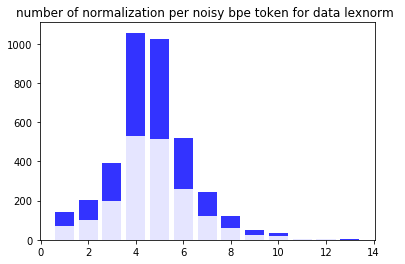

In [82]:
plot_n_norm_per_bpe(dic_counter={"bpe":bpe_counter})#,
#                                 "normed":bpe_normed_counter,"need_norm":bpe_need_norm_counter})

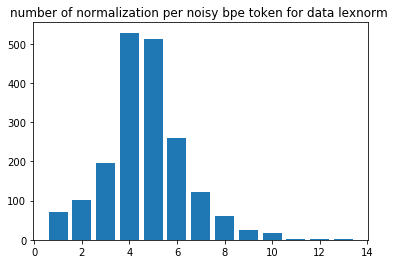

In [27]:
plot_n_norm_per_bpe(bpe_normed_counter)

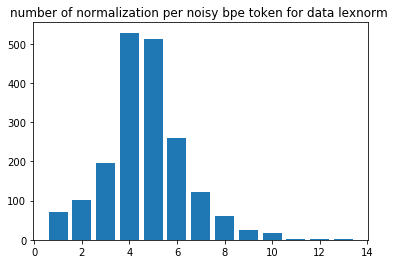

In [28]:
plot_n_norm_per_bpe(bpe_need_norm_counter)

## Embedding

In [6]:
voc_tokenizer = BERT_MODEL_DIC["bert-cased"]["vocab"]
model_dir = BERT_MODEL_DIC["bert-cased"]["model"]
vocab_size = BERT_MODEL_DIC["bert-cased"]["vocab_size"]
tokenizer = BertTokenizer.from_pretrained(voc_tokenizer)
null_token_index = BERT_MODEL_DIC["bert-cased"]["vocab_size"]  # based on bert cased vocabulary

initialize_bpe_layer = True
freeze_parameters = True
freeze_layer_prefix_ls = ["bert"]
#["bert"]
new=False
if new:
    model = get_bert_token_classification(pretrained_model_dir=model_dir,
                                      vocab_size=vocab_size, dropout_classifier=0.5,
                                      freeze_parameters=freeze_parameters,
                                      freeze_layer_prefix_ls=freeze_layer_prefix_ls,
                                      dropout_bert=0.2,
                                      initialize_bpe_layer=initialize_bpe_layer)
else:
    #model_location = "/Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/./checkpoints/bert/b5338-LOOK_THE_PREDICTIONS-2batch-0.0001lr"
    #checkpoint_dir = os.path.join(model_location,"b5338-LOOK_THE_PREDICTIONS-2batch-0.0001lr-ep24-checkpoint.pt")
    model_location = "/Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/./checkpoints/bert/9317504-B-9988a-9317504-B-model_6"
    checkpoint_dir = os.path.join(model_location,"9317504-B-9988a-9317504-B-model_6-ep20-checkpoint.pt")
    
    # NORMALIZER FINE TUNE ON POS
    model_location ="/Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/checkpoints/bert/"
    checkpoint_name = "9325721-B-1baff-9325721-B-model_0/9325721-B-1baff-9325721-B-model_0-ep9-checkpoint.pt"
    # NORMALIZER BEST
    checkpoint_name= "9318015-B-bbd89-9318015-B-model_0/9318015-B-bbd89-9318015-B-model_0/9318015-B-bbd89-9318015-B-model_0-ep20-checkpoint.pt"
    
    checkpoint_dir = os.path.join(model_location, checkpoint_name)

    model_trained = get_bert_token_classification(vocab_size=vocab_size,
                                                 checkpoint_dir=checkpoint_dir)

DEFAULT : DROPOUT CLASSIFIER set to 0.1 
MODEL : loading model BERT+token classification pretrained from checkpoint /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/checkpoints/bert/9318015-B-bbd89-9318015-B-model_0/9318015-B-bbd89-9318015-B-model_0/9318015-B-bbd89-9318015-B-model_0-ep20-checkpoint.pt


### Predictions

In [6]:
src="okayy my friends is aweeesome"
gold = "okay my friend is awesome"

src_bert = bert_predict(input_string=src, bert_token_classification=model,use_gpu=False,
                     tokenizer=tokenizer,topk=1, null_str="_", null_token_index=null_token_index,
                     verbose=1)
gold_bert = bert_predict(input_string=gold, bert_token_classification=model,use_gpu=False,
                     tokenizer=tokenizer,topk=1, null_str="_", null_token_index=null_token_index,
                     verbose=1)

In [7]:
def printout_key(pred_bert, keys=["word","bpe"], label=""):
    for key in keys:
        print("{} {}  = {} \npred = {}".format(label,key,pred_bert["src"][key],pred_bert["pred"][key]))

printout_key(pred_bert=src_bert, label="src")
printout_key(pred_bert=gold_bert, label="gold")

src word  = ['[CLS] okayy my friends is aweeesome [SEP]'] 
pred = ['[CLS] okay my friends is awesome [SEP]']
src bpe  = [['[CLS]', 'okay', '##y', 'my', 'friends', 'is', 'awe', '##ees', '##ome', '[SEP]']] 
pred = [[['[CLS]', 'okay', '_', 'my', 'friends', 'is', 'awesome', '_', '_', '[SEP]']]]
gold word  = ['[CLS] okay my friend is awesome [SEP]'] 
pred = ['[CLS] okay my friend is awesome [SEP]']
gold bpe  = [['[CLS]', 'okay', 'my', 'friend', 'is', 'awesome', '[SEP]']] 
pred = [[['[CLS]', 'okay', 'my', 'friend', 'is', 'awesome', '[SEP]']]]


### Embedding vis

In [228]:
#mask_token_index = tokenizer.convert_tokens_to_ids(["[MASK]"])[0]
out = bpe_statistics_on_data(LIU_DEV, "../dictionaries",mask_token_index=mask_token_index,
                             output="embedding",bert_token_classification=model,
                             early_breaking=400,
                             verbose=0)

VOCABULARY : computing dictionary for word, char on /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/env/.././data/LiLiu/2577_tweets-li-dev_500.conll for task normalize 
VOCABULARY : computing dictionary for normalized word also /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/env/.././data/LiLiu/2577_tweets-li-dev_500.conll 
VOCABULARY : POS Vocabulary : pos dictionary untouched
Overwriting dictionary ../dictionaries/word.json
Overwriting dictionary ../dictionaries/word_norm.json
Overwriting dictionary ../dictionaries/character.json
Overwriting dictionary ../dictionaries/pos.json
Overwriting dictionary ../dictionaries/xpos.json
Overwriting dictionary ../dictionaries/type.json
VOCABULARY WORDS was not expanded on dev or test cause no external word embedding dict wa provided
VOCABULARY : 2715 word 2394 word_norm 95 char 4 xpos 4 pos 4 type encoded in vocabulary (including default token, an special tokens)
WARNING symbolic root True is and symbolic end is True 
Reading data f

In [229]:
out_normalizer = bpe_statistics_on_data(LIU_DEV, "../dictionaries",mask_token_index=mask_token_index, output="embedding",
                             bert_token_classification=model_trained,
                             early_breaking=400,
                             verbose=0)

VOCABULARY : computing dictionary for word, char on /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/env/.././data/LiLiu/2577_tweets-li-dev_500.conll for task normalize 
VOCABULARY : computing dictionary for normalized word also /Users/bemuller/Documents/Work/INRIA/dev/mt_norm_parse/env/.././data/LiLiu/2577_tweets-li-dev_500.conll 
VOCABULARY : POS Vocabulary : pos dictionary untouched
Overwriting dictionary ../dictionaries/word.json
Overwriting dictionary ../dictionaries/word_norm.json
Overwriting dictionary ../dictionaries/character.json
Overwriting dictionary ../dictionaries/pos.json
Overwriting dictionary ../dictionaries/xpos.json
Overwriting dictionary ../dictionaries/type.json
VOCABULARY WORDS was not expanded on dev or test cause no external word embedding dict wa provided
VOCABULARY : 2715 word 2394 word_norm 95 char 4 xpos 4 pos 4 type encoded in vocabulary (including default token, an special tokens)
WARNING symbolic root True is and symbolic end is True 
Reading data f

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 802 samples in 0.054s...
[t-SNE] Computed neighbors for 802 samples in 1.554s...
[t-SNE] Computed conditional probabilities for sample 802 / 802
[t-SNE] Mean sigma: 1.409072
[t-SNE] Computed conditional probabilities in 0.042s
[t-SNE] Iteration 50: error = 92.1903915, gradient norm = 0.3931621 (50 iterations in 1.043s)
[t-SNE] Iteration 100: error = 91.2774658, gradient norm = 0.3960155 (50 iterations in 0.658s)
[t-SNE] Iteration 150: error = 92.5166397, gradient norm = 0.3995514 (50 iterations in 0.435s)
[t-SNE] Iteration 200: error = 93.0923462, gradient norm = 0.4005303 (50 iterations in 0.916s)
[t-SNE] Iteration 250: error = 94.2665329, gradient norm = 0.3870735 (50 iterations in 0.643s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.266533
[t-SNE] Iteration 300: error = 2.2842751, gradient norm = 0.0057713 (50 iterations in 0.532s)
[t-SNE] Iteration 350: error = 1.8528372, gradient norm = 0.0019651 (

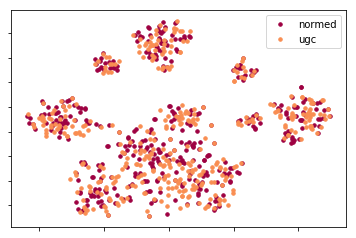

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 802 samples in 0.037s...
[t-SNE] Computed neighbors for 802 samples in 1.293s...
[t-SNE] Computed conditional probabilities for sample 802 / 802
[t-SNE] Mean sigma: 1.708049
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 102.7658691, gradient norm = 0.3951594 (50 iterations in 0.539s)
[t-SNE] Iteration 100: error = 109.8334274, gradient norm = 0.3526209 (50 iterations in 0.832s)
[t-SNE] Iteration 150: error = 107.7984695, gradient norm = 0.3861440 (50 iterations in 0.727s)
[t-SNE] Iteration 200: error = 108.5982895, gradient norm = 0.3468553 (50 iterations in 0.654s)
[t-SNE] Iteration 250: error = 105.7222519, gradient norm = 0.4027514 (50 iterations in 0.511s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.722252
[t-SNE] Iteration 300: error = 2.8405423, gradient norm = 0.0061919 (50 iterations in 0.653s)
[t-SNE] Iteration 350: error = 2.5013237, gradient norm = 0.002

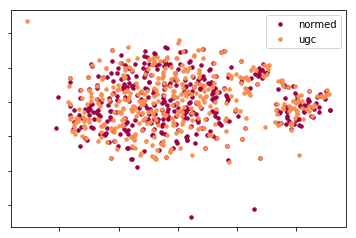

In [230]:
plot_sentence_embedding(gold_embedding=out["gold"],perplexity=7,
                        noisy_embedding=out["input"])
plot_sentence_embedding(gold_embedding=out_normalizer["gold"],perplexity=7,
                        noisy_embedding=out_normalizer["input"])


In [234]:
from scipy.spatial.distance import cosine
def cosine_compare(gold, noisy, label=""):
    cos = 0
    cos_ls = []
    for gold_vec, noisy_vec in zip(gold, noisy):
        _cos = cosine(gold_vec,noisy_vec)
        cos_ls.append(_cos)
        cos+=_cos
        #print("{} : {}".format(label,_cos))
    cos_ls = np.array(cos_ls)
    print("FINAL {} : mean {:.5f}, var:{:.4f} count:{}".format(label,np.mean(cos_ls), np.var(cos_ls), len(cos_ls)))
    return cos_ls
def order_count(cos_ls, cos_ls_norm):
    count = 0
    n=0
    for cos, cos_norm in zip(cos_ls, cos_ls_norm):
        n+=1
        count+=(cos_norm-cos>0)
    print("FINAL {:0.1f}%".format(count/n*100))
    return count, n

In [235]:
cos_ls = cosine_compare(out["gold"],out["input"],label="bert" )
cos_ls_norm = cosine_compare(out_normalizer["gold"],out_normalizer["input"],label="bert+normalizer")

FINAL bert : mean 0.15111, var:0.0028 count:401
FINAL bert+normalizer : mean 0.15735, var:0.0006 count:401


In [236]:
count, card = order_count(cos_ls, cos_ls_norm)
count, count, card

FINAL 56.4%


(226, 226, 401)

### Cosine Comparison 

- on lexnorm (200)
    - +0.1 in cosine simiarity in before normalization after normalization 
    - 56% of pairs actually got closer after fine tuning
- on liu dev (400)
    - +6e-3 (+0.6%)
    - counting 55%